## Plot the time evolution of period and the related folded profiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('astro')

In [2]:
df_evt_orbit=pd.read_csv('all_lc_periods_chisq_py_evt_files_bary_orbit.txt',sep='\t')
#df_evt_uncorrected=pd.read_csv('all_lc_periods_chisq_py_evt_file_uncorrected.txt',sep='\t')
df_lc_uncorrected=pd.read_csv('all_lc_periods_chisq_py_lc_files_orbit.txt',sep='\t')

In [3]:
df_evt_orbit['freq']=1000/df_evt_orbit["Period"]
df_lc_uncorrected['freq']=1000/df_lc_uncorrected['Period']

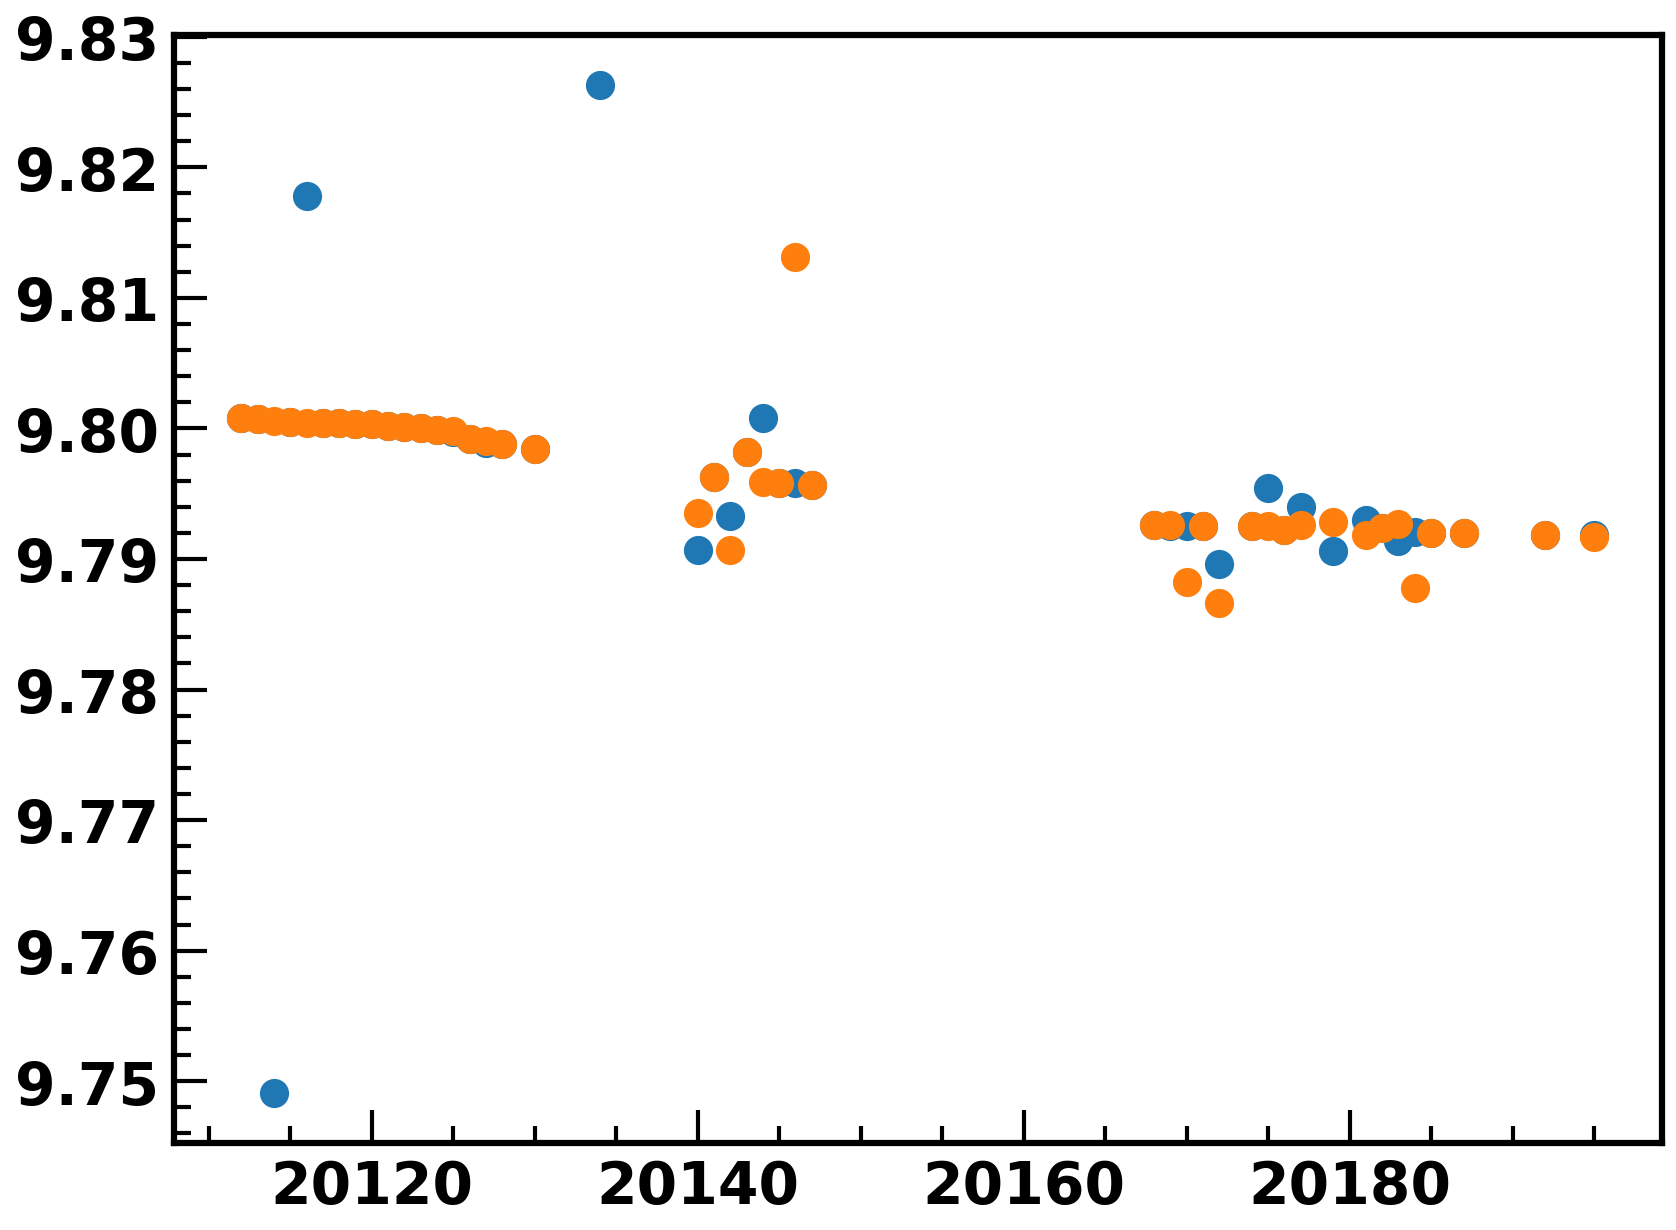

In [4]:
plt.scatter(df_evt_orbit['Date'],df_evt_orbit['Period'])
# plt.scatter(df_evt_uncorrected['Date'],df_evt_uncorrected['freq'])
plt.scatter(df_lc_uncorrected['Date'],df_lc_uncorrected['Period'])

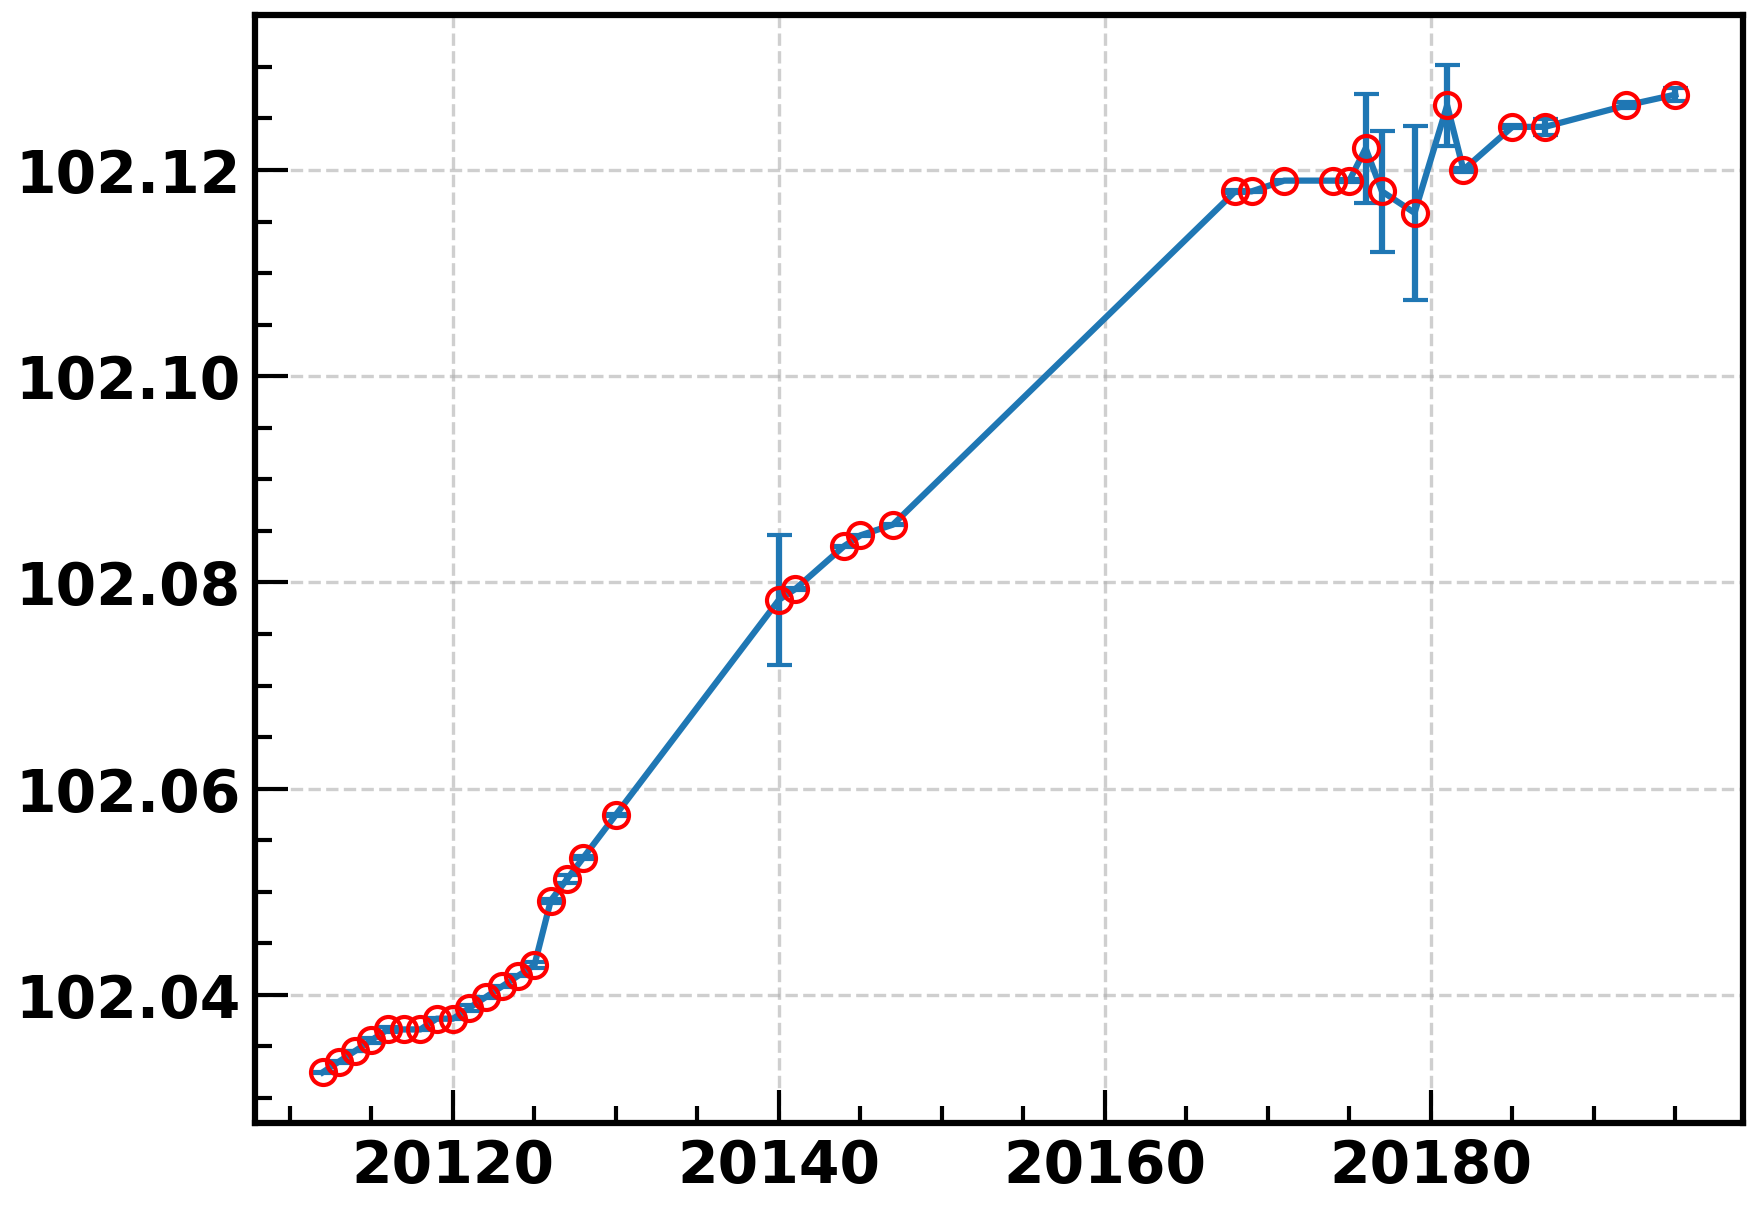

In [5]:
error_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_manual_error_from_lc_uncor_bootstrap.csv',sep='\t',comment='#')
freq_error=1000*error_df['PErr']/error_df['Period']**2
plt.errorbar(error_df['Date'],error_df['freq'],yerr=freq_error,marker='o',capsize=3,markeredgecolor='r',markerfacecolor='none')
plt.grid(alpha=0.6, linestyle='--')

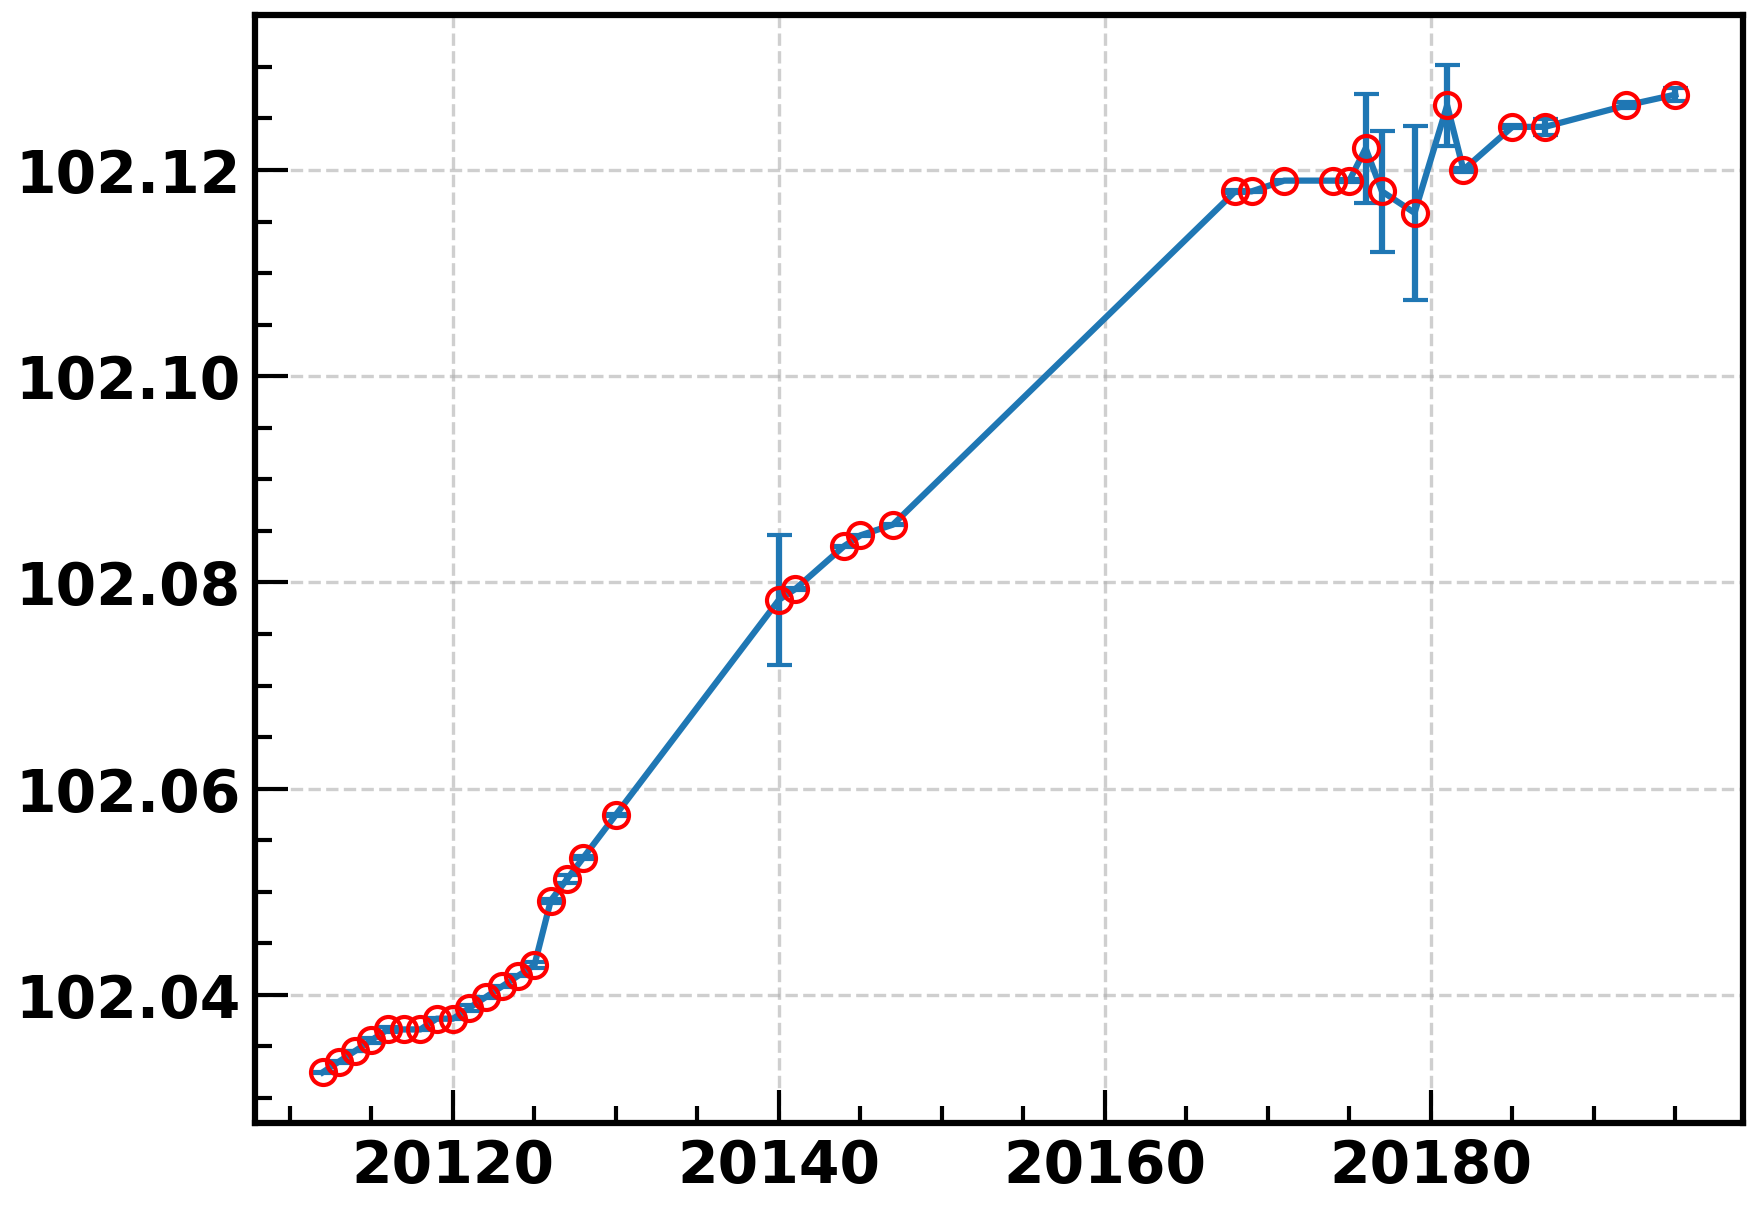

In [6]:
error_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_manual_error_from_lc_uncor_bootstrap.csv',sep='\t',comment='#')
freq_error=1000*error_df['PErr']/error_df['Period']**2
plt.errorbar(error_df['Date'],error_df['freq'],yerr=freq_error,marker='o',capsize=3,markeredgecolor='r',markerfacecolor='none')
plt.grid(alpha=0.6, linestyle='--')

In [7]:
# Define the file path (assuming it's in the same directory)
file_name = "/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_manual_error_from_lc_uncor_bootstrap.csv"

# Read the file, skipping comment lines (starting with ##)
df_time = pd.read_csv(file_name, sep='\s+', comment="#")

# Convert obsID column to string (in case it's read as an integer)
df_time["LC_File_Path"] = df_time["LC_File_Path"].astype(str)

df_spec=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/NICER_second_run/reporting_spectra_iteration_2.csv", sep='\t', comment="#")
df_spec['Obs ID'] = df_spec['Obs ID'].astype(str)

df_time = df_time.merge(df_spec[['Obs ID', 'Lumin']], left_on='LC_File_Path', right_on='Obs ID', how='left')
df_time.head(5)

LC_File_Path  Period   Chi-square   Date      PErr        freq      Obs ID  \
0   6050390227  9.8008  21567.52930  20112  0.000006  102.032487  6050390227   
1   6050390228  9.8007  19102.22656  20113  0.000010  102.033528  6050390228   
2   6050390229  9.8006  31955.07617  20114  0.000002  102.034569  6050390229   
3   6050390230  9.8005  20849.02930  20115  0.000024  102.035610  6050390230   
4   6050390231  9.8004  29042.08008  20116  0.000021  102.036652  6050390231   

          Lumin  
0  4.070000e+37  
1  4.300000e+37  
2  4.460000e+37  
3  5.250000e+37  
4  5.360000e+37

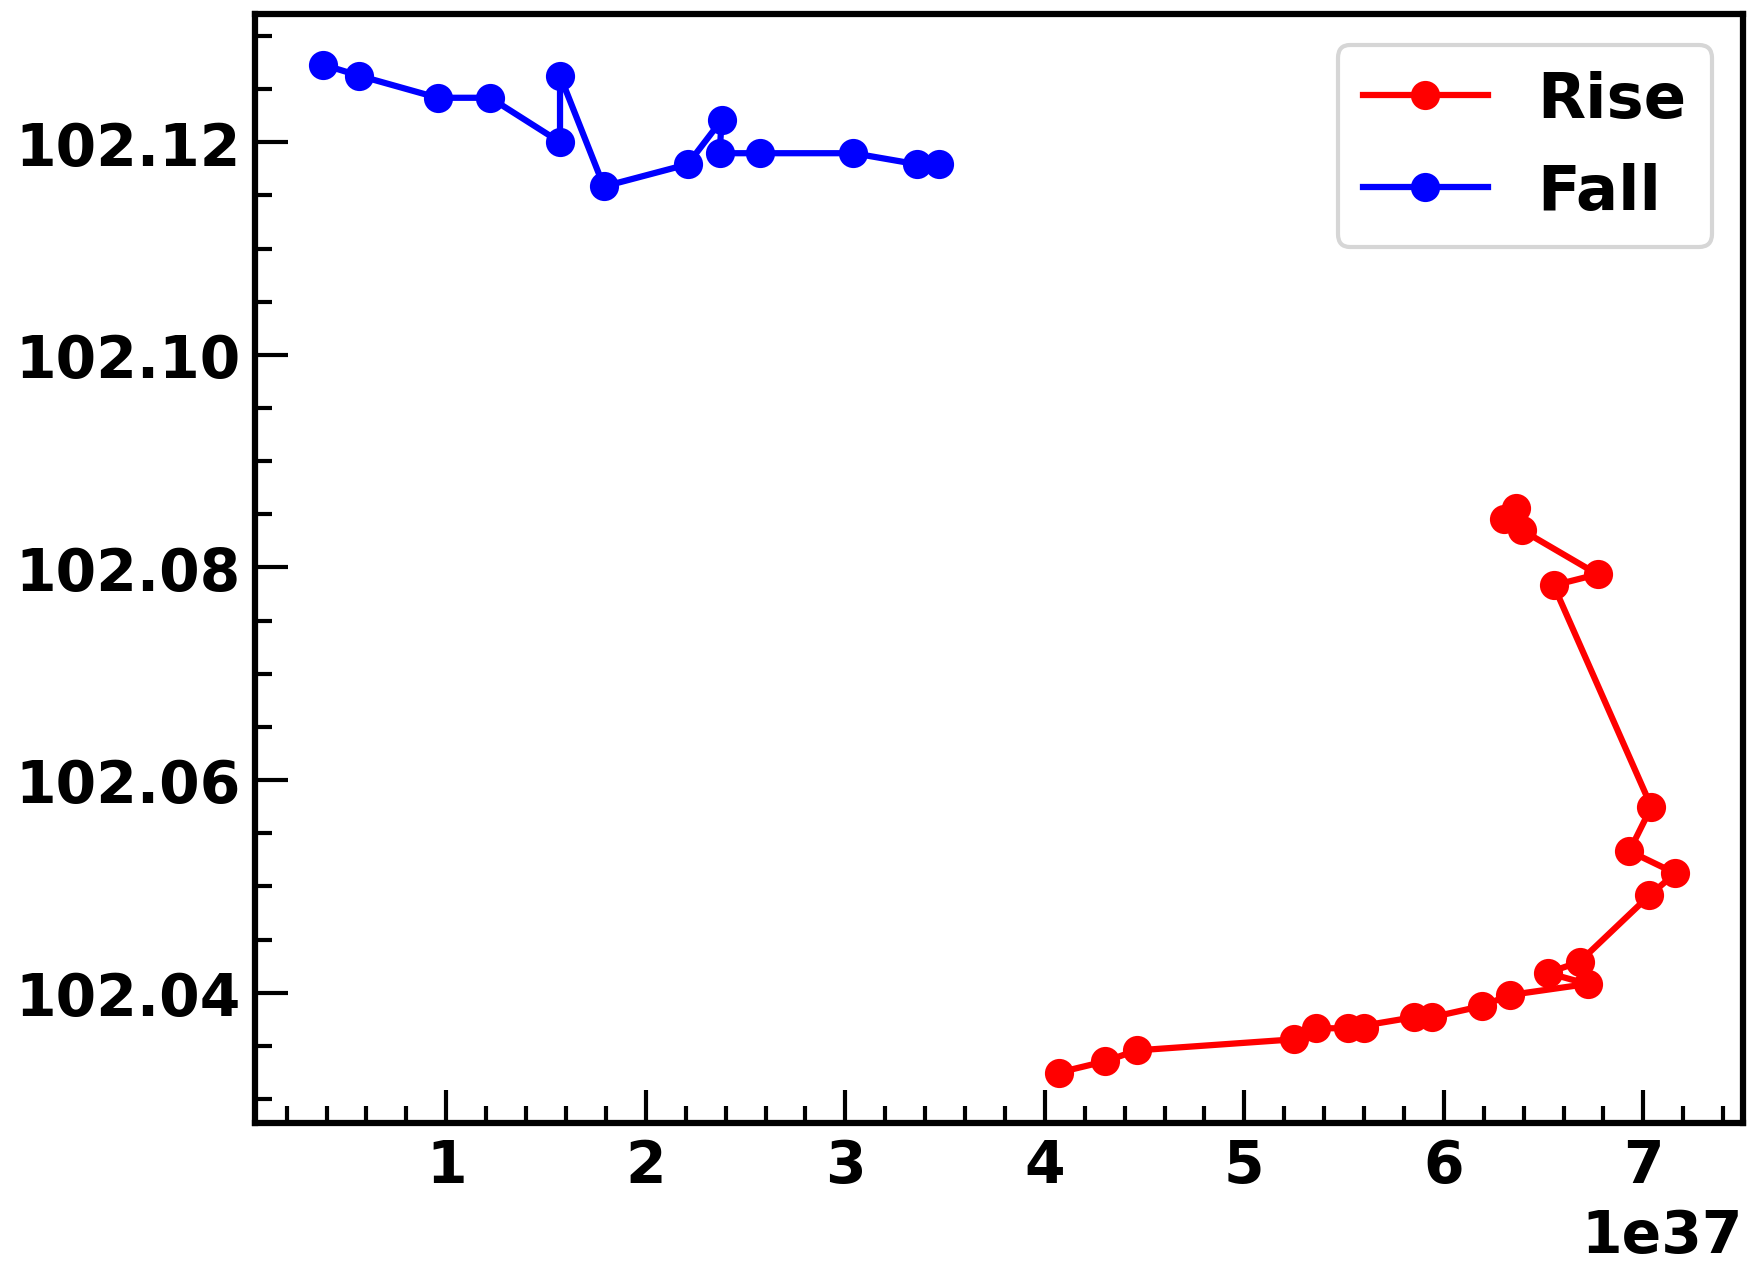

In [8]:
plt.plot(df_time['Lumin'][:23], 1000/df_time['Period'][:23], '-o',color='red',label='Rise')
plt.plot(df_time['Lumin'][23:], 1000/df_time['Period'][23:], '-o',color='blue',label='Fall')
plt.legend()

## Plotting individual plot

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [10]:
def read_and_plot_fits_file(file_path):

    plt.figure(figsize=(10, 6))
    for files in file_path:
        print(files)
        # Open the FITS file
        with fits.open(files) as hdul:

            # Assuming you want to plot the first HDU (Header Data Unit)
            data = hdul[1].data

            # Plotting the data
            plt.plot(data['PHASE'], data['RATE1'], marker='o', linestyle='-', label=files.split('/')[-2])

    plt.xlabel('PHASE')
    plt.ylabel('RATE1')
    plt.title('Combined Period vs Date from FITS files')
    plt.legend()
    plt.grid()

/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390248/6050390248_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390250/6050390250_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390252/6050390252_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390253/6050390253_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390254/6050390254_pulse_profile_lc_files_efold_output_same_epoch.fits


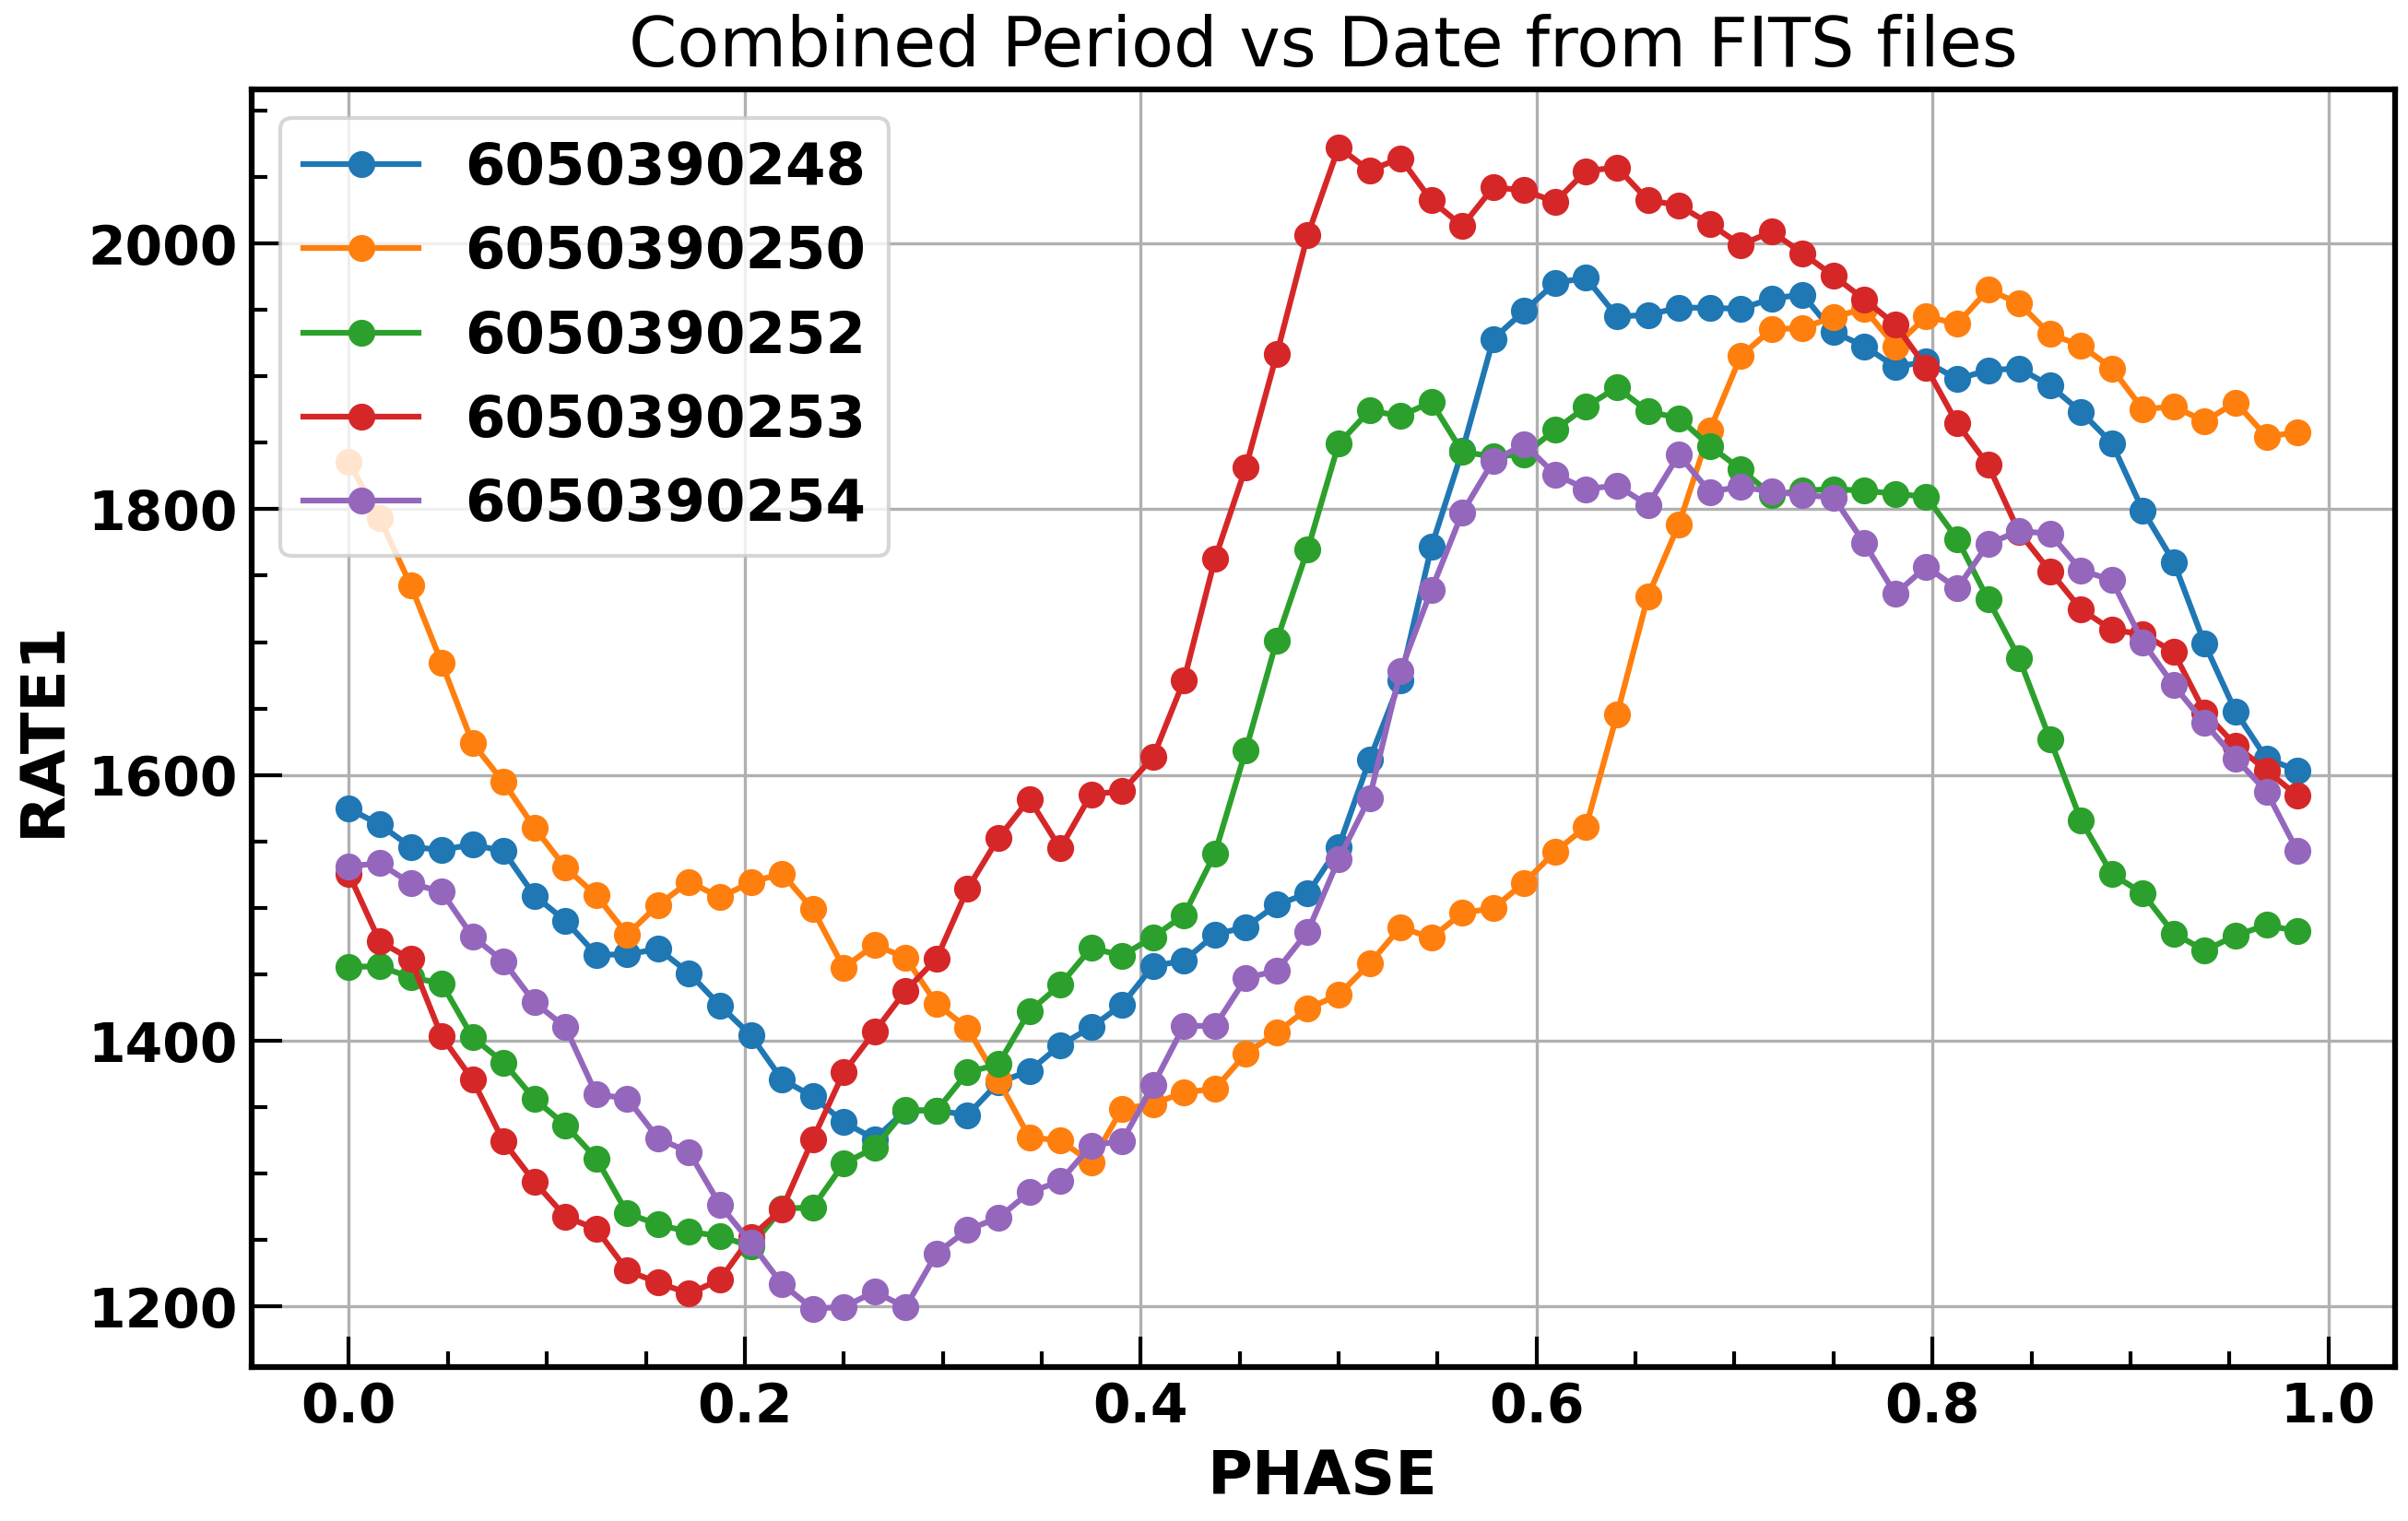

In [11]:
file_paths=[
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390228/6050390228_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390230/6050390230_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390232/6050390232_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390233/6050390233_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390234/6050390234_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390235/6050390235_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390236/6050390236_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390237/6050390237_pulse_profile_evt_files_efold_output_same_epoch.fits',
# '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390238/6050390238_pulse_profile_evt_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390248/6050390248_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390250/6050390250_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390252/6050390252_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390253/6050390253_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390254/6050390254_pulse_profile_lc_files_efold_output_same_epoch.fits']

read_and_plot_fits_file(file_paths)

/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390255/6050390255_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390256/6050390256_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390257/6050390257_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390258/6050390258_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_lc_files_efold_output_same_epoch.fits


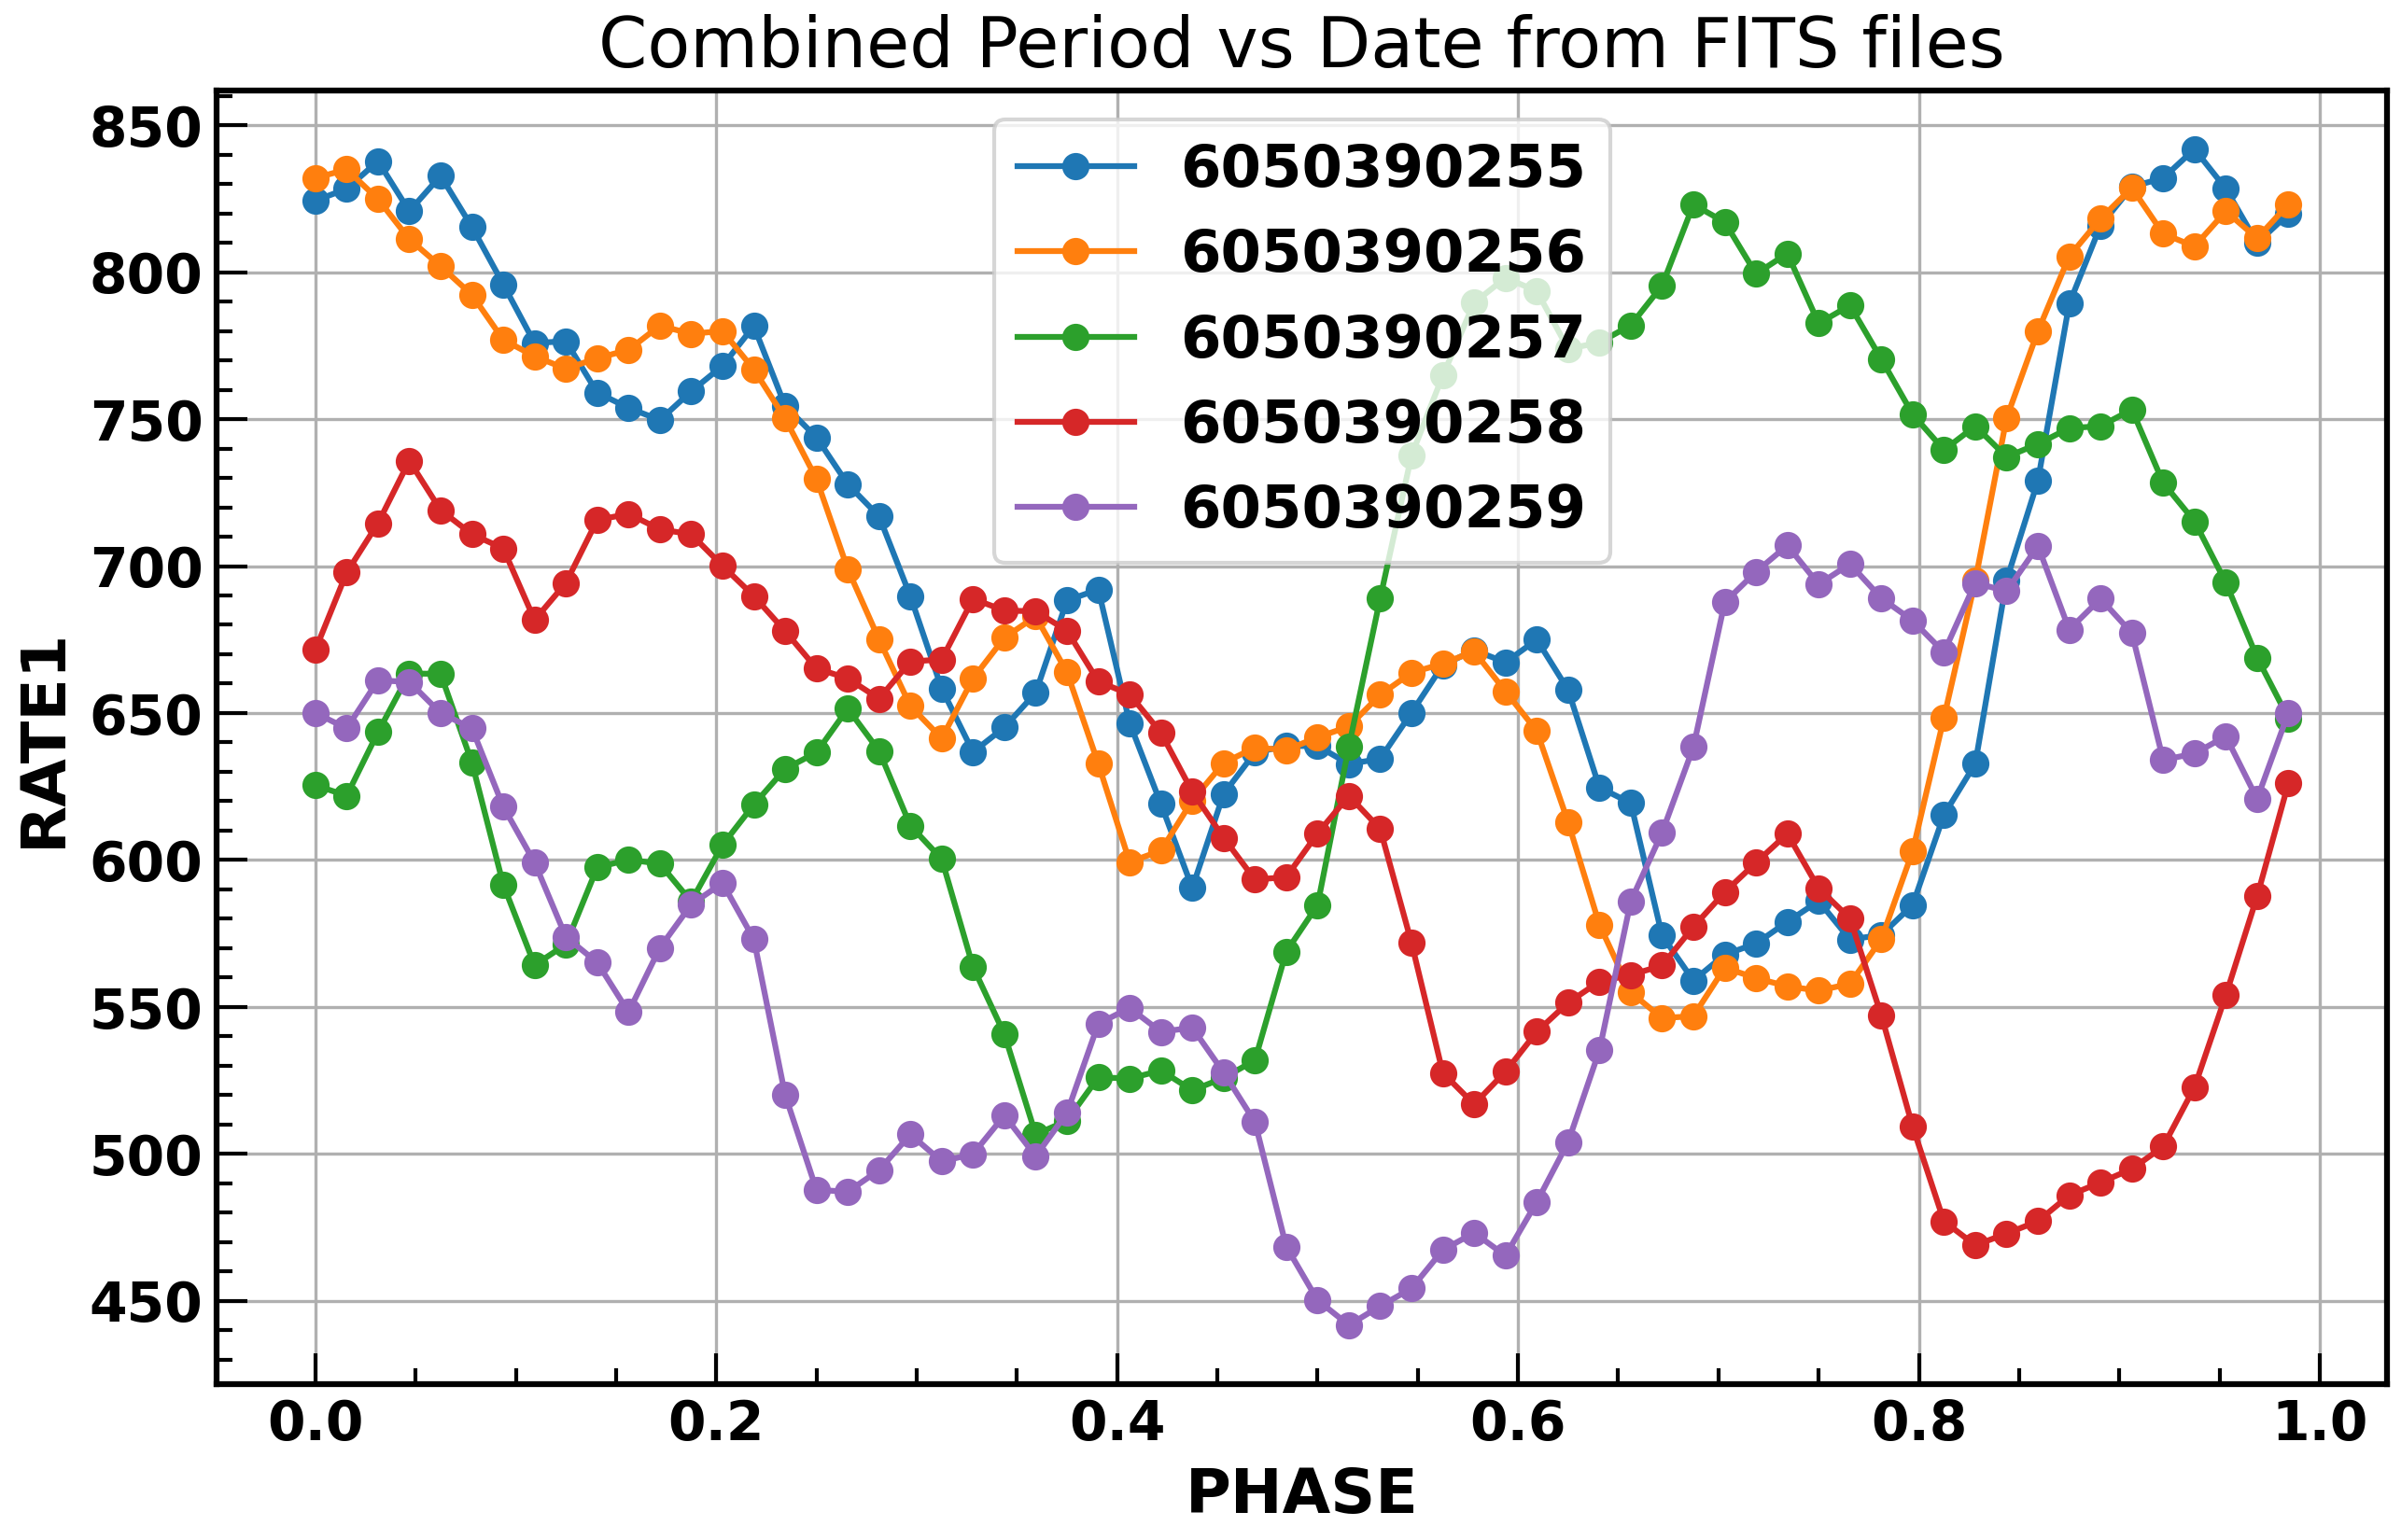

In [12]:
file_paths=[
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390255/6050390255_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390256/6050390256_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390257/6050390257_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390258/6050390258_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_lc_files_efold_output_same_epoch.fits',]

read_and_plot_fits_file(file_paths)

/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390261/6050390261_pulse_profile_lc_files_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390262/6050390262_pulse_profile_lc_files_efold_output_same_epoch.fits


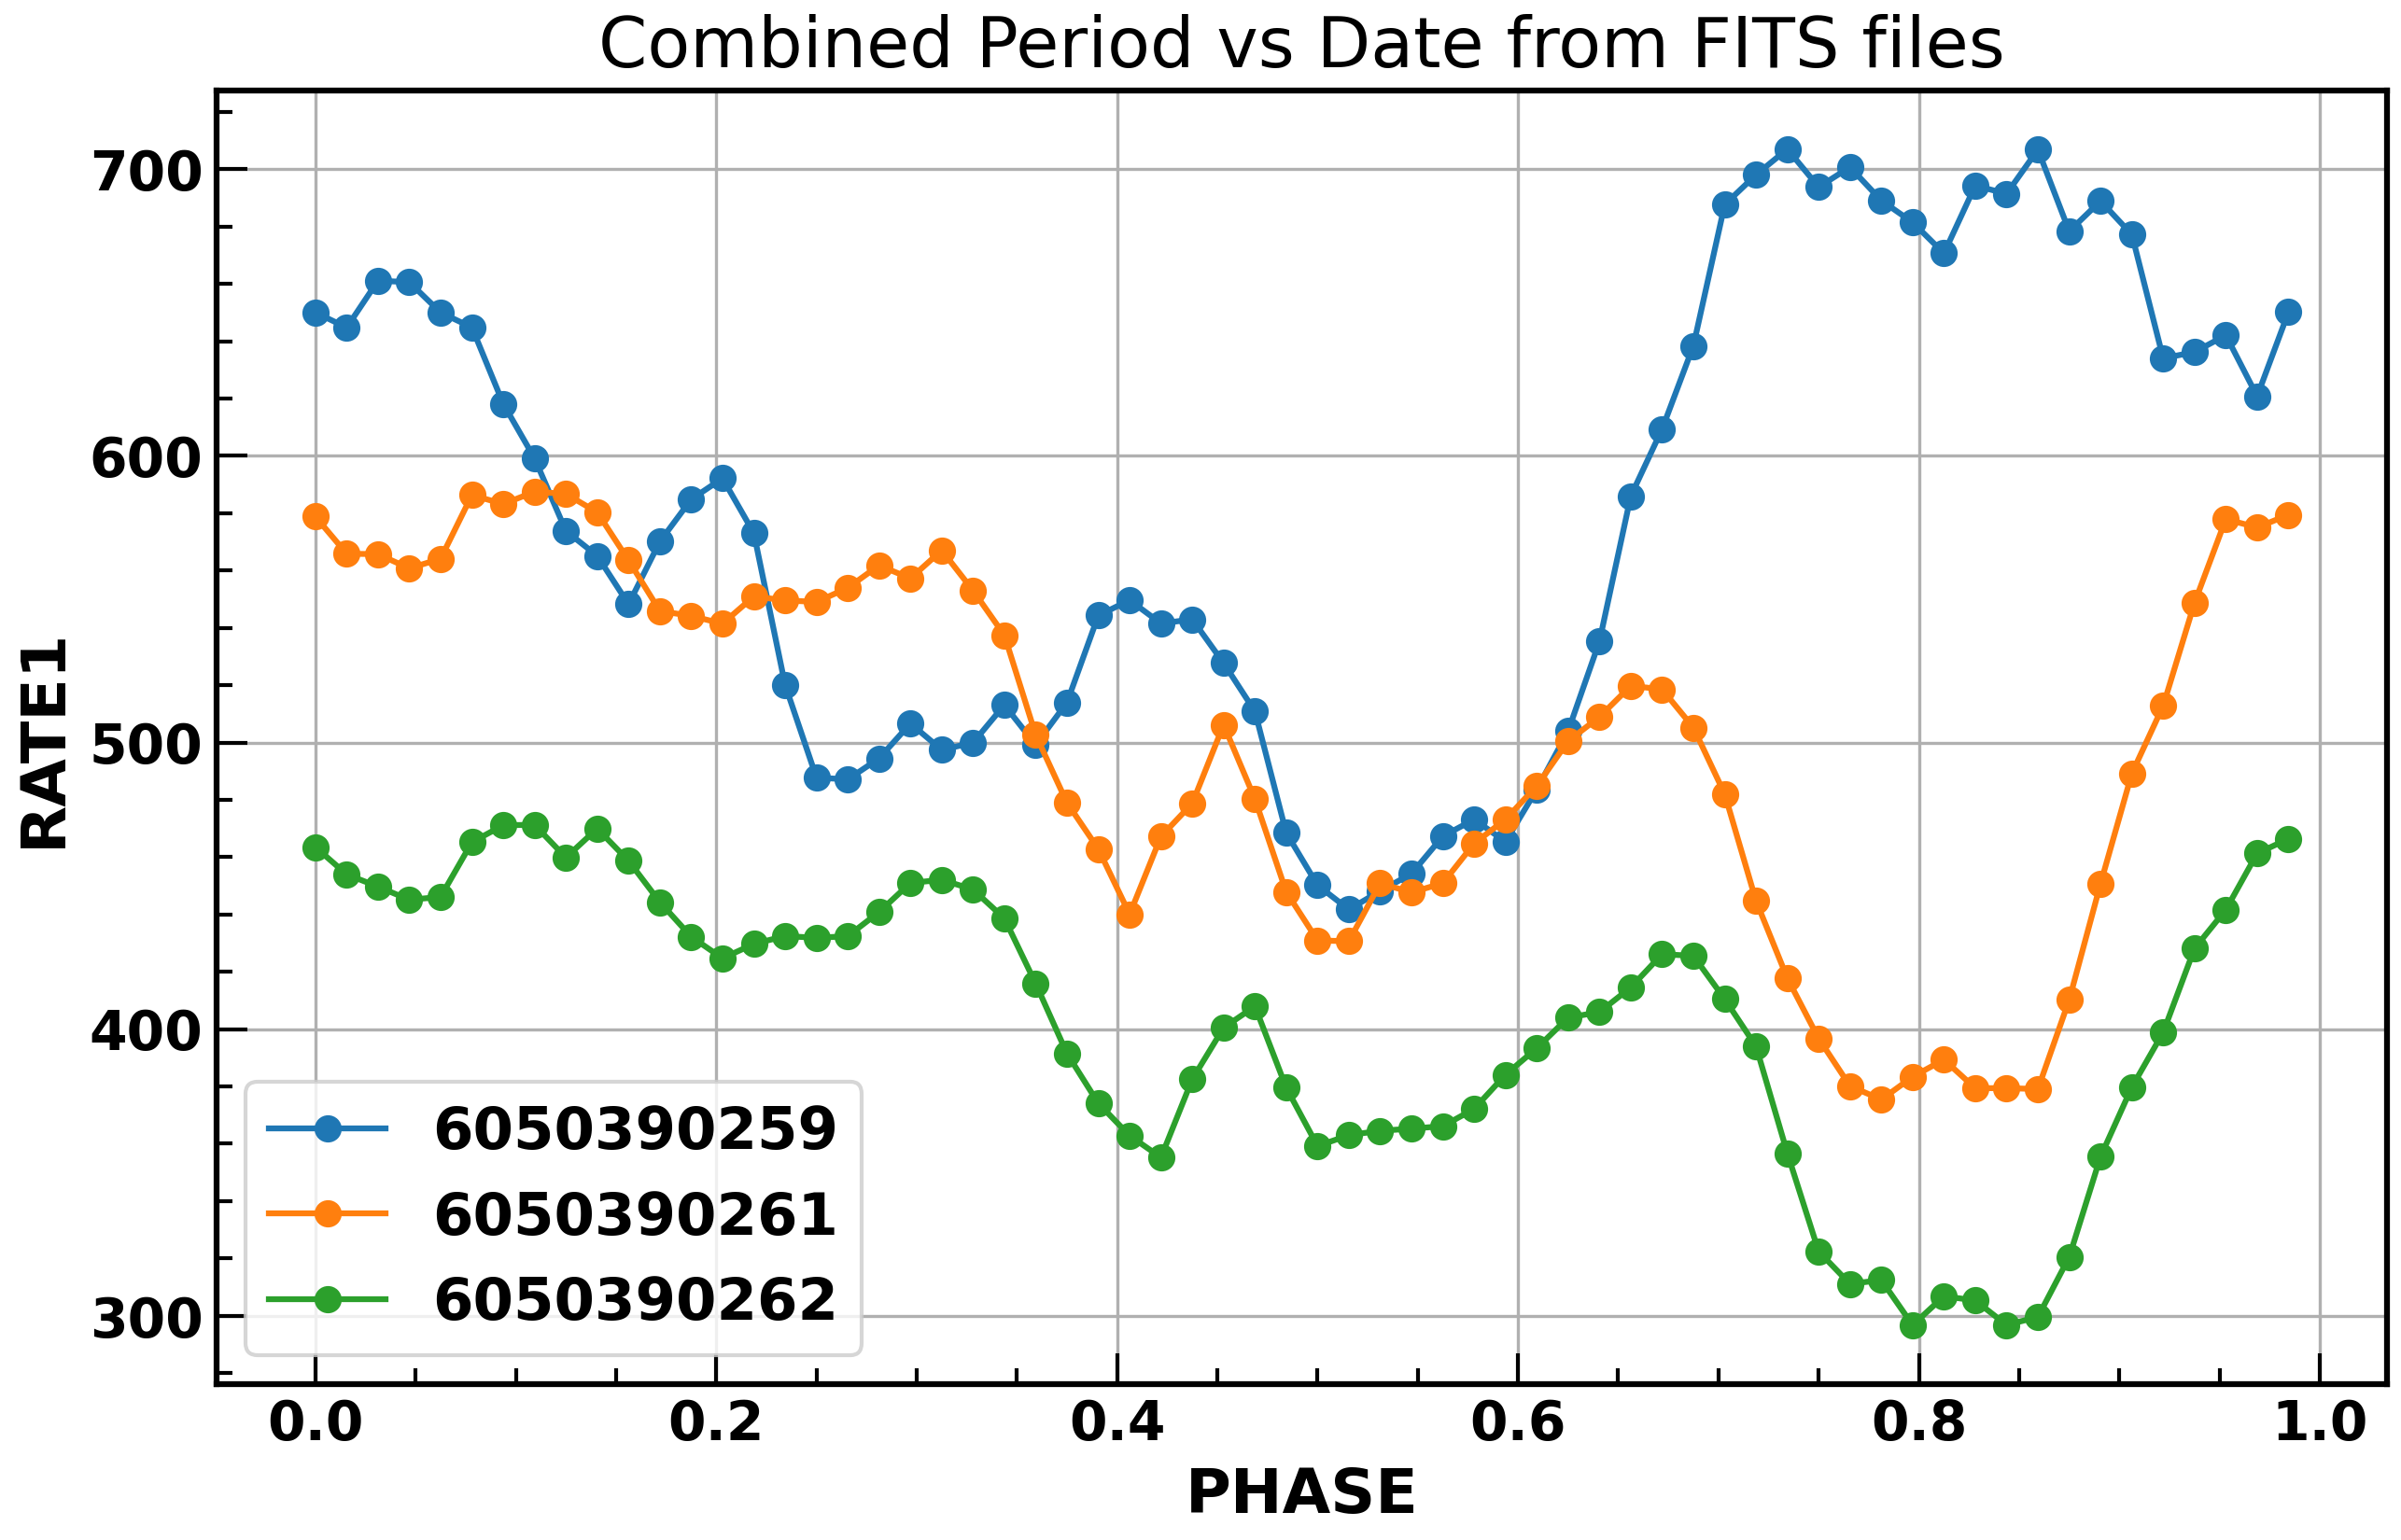

In [13]:
file_paths=[
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390261/6050390261_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390262/6050390262_pulse_profile_lc_files_efold_output_same_epoch.fits',]

read_and_plot_fits_file(file_paths)

## HXMT Light curves

In [14]:
file_paths=[
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_evt_files_efold_output_same_epoch.fits']

read_and_plot_fits_file(file_paths)

/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_evt_files_efold_output_same_epoch.fits


FileNotFoundError: [Errno 2] No such file or directory: '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390259/6050390259_pulse_profile_evt_files_efold_output_same_epoch.fits'

<Figure size 3000x1800 with 0 Axes>

/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600801/LE/P050419600801_LE_pulse_profile_efold_output_same_epoch.fits
/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600801/ME/P050419600801_ME_pulse_profile_efold_output_same_epoch.fits


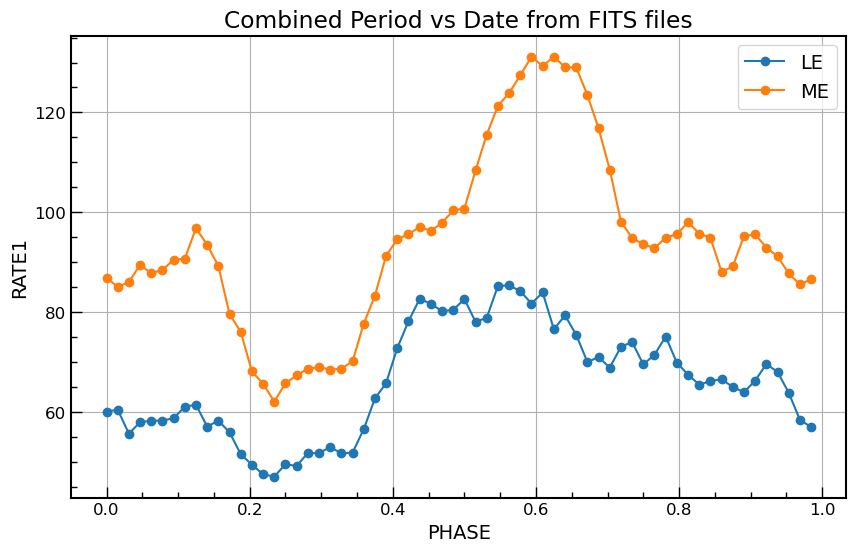

In [ ]:
file_paths=[
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600801/LE/P050419600801_LE_pulse_profile_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_efold_output/P050419600801/ME/P050419600801_ME_pulse_profile_efold_output_same_epoch.fits',]

read_and_plot_fits_file(file_paths)

In [ ]:
def plot_added_profiles(file1, file2):
    fits1=fits.open(file1)[1].data
    fits2=fits.open(file2)[1].data

    total_rate=fits1['RATE1']+fits2['RATE1']
    phase=fits1['PHASE']
    return phase, total_rate

In [ ]:
# def new_func():
#     file_8001_le='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419600801/LE/P050419600801_LE_pulse_profile_efold_output_same_epoch.fits'
#     file_8001_me='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419600801/ME/P050419600801_ME_pulse_profile_efold_output_same_epoch.fits'

#     file_1301_le='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419601301/LE/P050419601301_LE_pulse_profile_efold_output_same_epoch.fits'
#     file_1301_me='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419601301/ME/P050419601301_ME_pulse_profile_efold_output_same_epoch.fits'

#     file_2002_le='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419601801/LE/P050419601801_LE_pulse_profile_efold_output_same_epoch.fits'
#     file_2002_me='/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_efold_output/P050419601801/ME/P050419601801_ME_pulse_profile_efold_output_same_epoch.fits'


#     phase_8001, total_rate_8001=plot_added_profiles(file_8001_le,file_8001_me)
#     phase_1301, total_rate_1301=plot_added_profiles(file_1301_le,file_1301_me)
#     phase_1902, total_rate_1901=plot_added_profiles(file_2002_le,file_2002_me)

#     plt.plot(phase_8001, total_rate_8001,'-o')
#     plt.plot(phase_1301,total_rate_1301,'-o')
#     plt.plot(phase_1902,total_rate_1901,'-o')


#     plt.grid()

# new_func()

In [ ]:
# read_and_plot_fits_file((file_8001_le,file_8001_me))
# read_and_plot_fits_file((file_1301_le,file_1301_me))
# read_and_plot_fits_file((file_2002_le,file_2002_me))

# Plotting Pulse Profiles

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
plt.style.use('astro')

def read_and_plot_fits_file(file_paths, savepath, labels=None):
    n_files = len(file_paths)
    assert n_files <= 6, "This script supports up to 6 panels."
    if labels:
        assert len(labels) == n_files, "Number of labels must match the number of files."

    # Create vertical stack of subplots (up to 6 rows)
    fig, axs = plt.subplots(n_files, 1, figsize=(8, 2.8 * n_files), sharex=True, sharey=True)
    axs = axs.flatten()

    for i, file in enumerate(file_paths):
        print(file)
        with fits.open(file) as hdul:
            data = hdul[1].data
            phase = data['PHASE']
            rate = data['AVG_FLUX']  # Using Ma'am's code
            error = data['AVG_FLUX_ERROR']

            # Extend phase and normalize rate
            extended_phase = np.concatenate([phase, phase + 1])
            extended_rate = np.concatenate([rate, rate]) / np.mean(rate)
            extended_error = np.concatenate([error, error]) / np.mean(rate)

            plot_label = labels[i] if labels else file.split('/')[-2]
            axs[i].errorbar(
                extended_phase, extended_rate, yerr=extended_error,
                marker='o', linestyle='-', label=plot_label,
                alpha=0.8, color='blue', markerfacecolor='none'
            )

            axs[i].set_xlim(0, 2)
            axs[i].set_ylim(0.65,1.3)
            axs[i].grid(alpha=0.6, linestyle='--')
            axs[i].minorticks_on()
            axs[i].legend(loc='upper right', framealpha=0.8, fontsize=16)

            if(i==3):
                axs[i].set_xlabel('Phase')
        

            # # Tick customization
            # axs[i].tick_params(axis='both', which='major', width=3, length=8, labelsize=18)
            # axs[i].tick_params(axis='y', which='minor', width=2.5, length=4)
            # axs[i].tick_params(axis='x', which='minor', width=2.5, length=4)

    # Hide x-axis tick labels for all but the last subplot
    for ax in axs[:-1]:
        ax.tick_params(labelbottom=False)

    # Common axis labels
    fig.text(0.010, 0.5, 'Normalized Count Rate', va='center', rotation='vertical', fontsize=18)

    # Adjust layout: more bottom space for large x-axis labels
    plt.subplots_adjust(hspace=0.00, left=0.1, right=0.98, top=0.98, bottom=0.06)
    plt.savefig(savepath, dpi=500, bbox_inches='tight')
    plt.show()
    plt.close()


/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390243/6050390243_rms_deviation_flux_errors.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_rms_deviation_flux_errors.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390265/6050390265_rms_deviation_flux_errors.fits
/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390279/6050390279_rms_deviation_flux_errors.fits


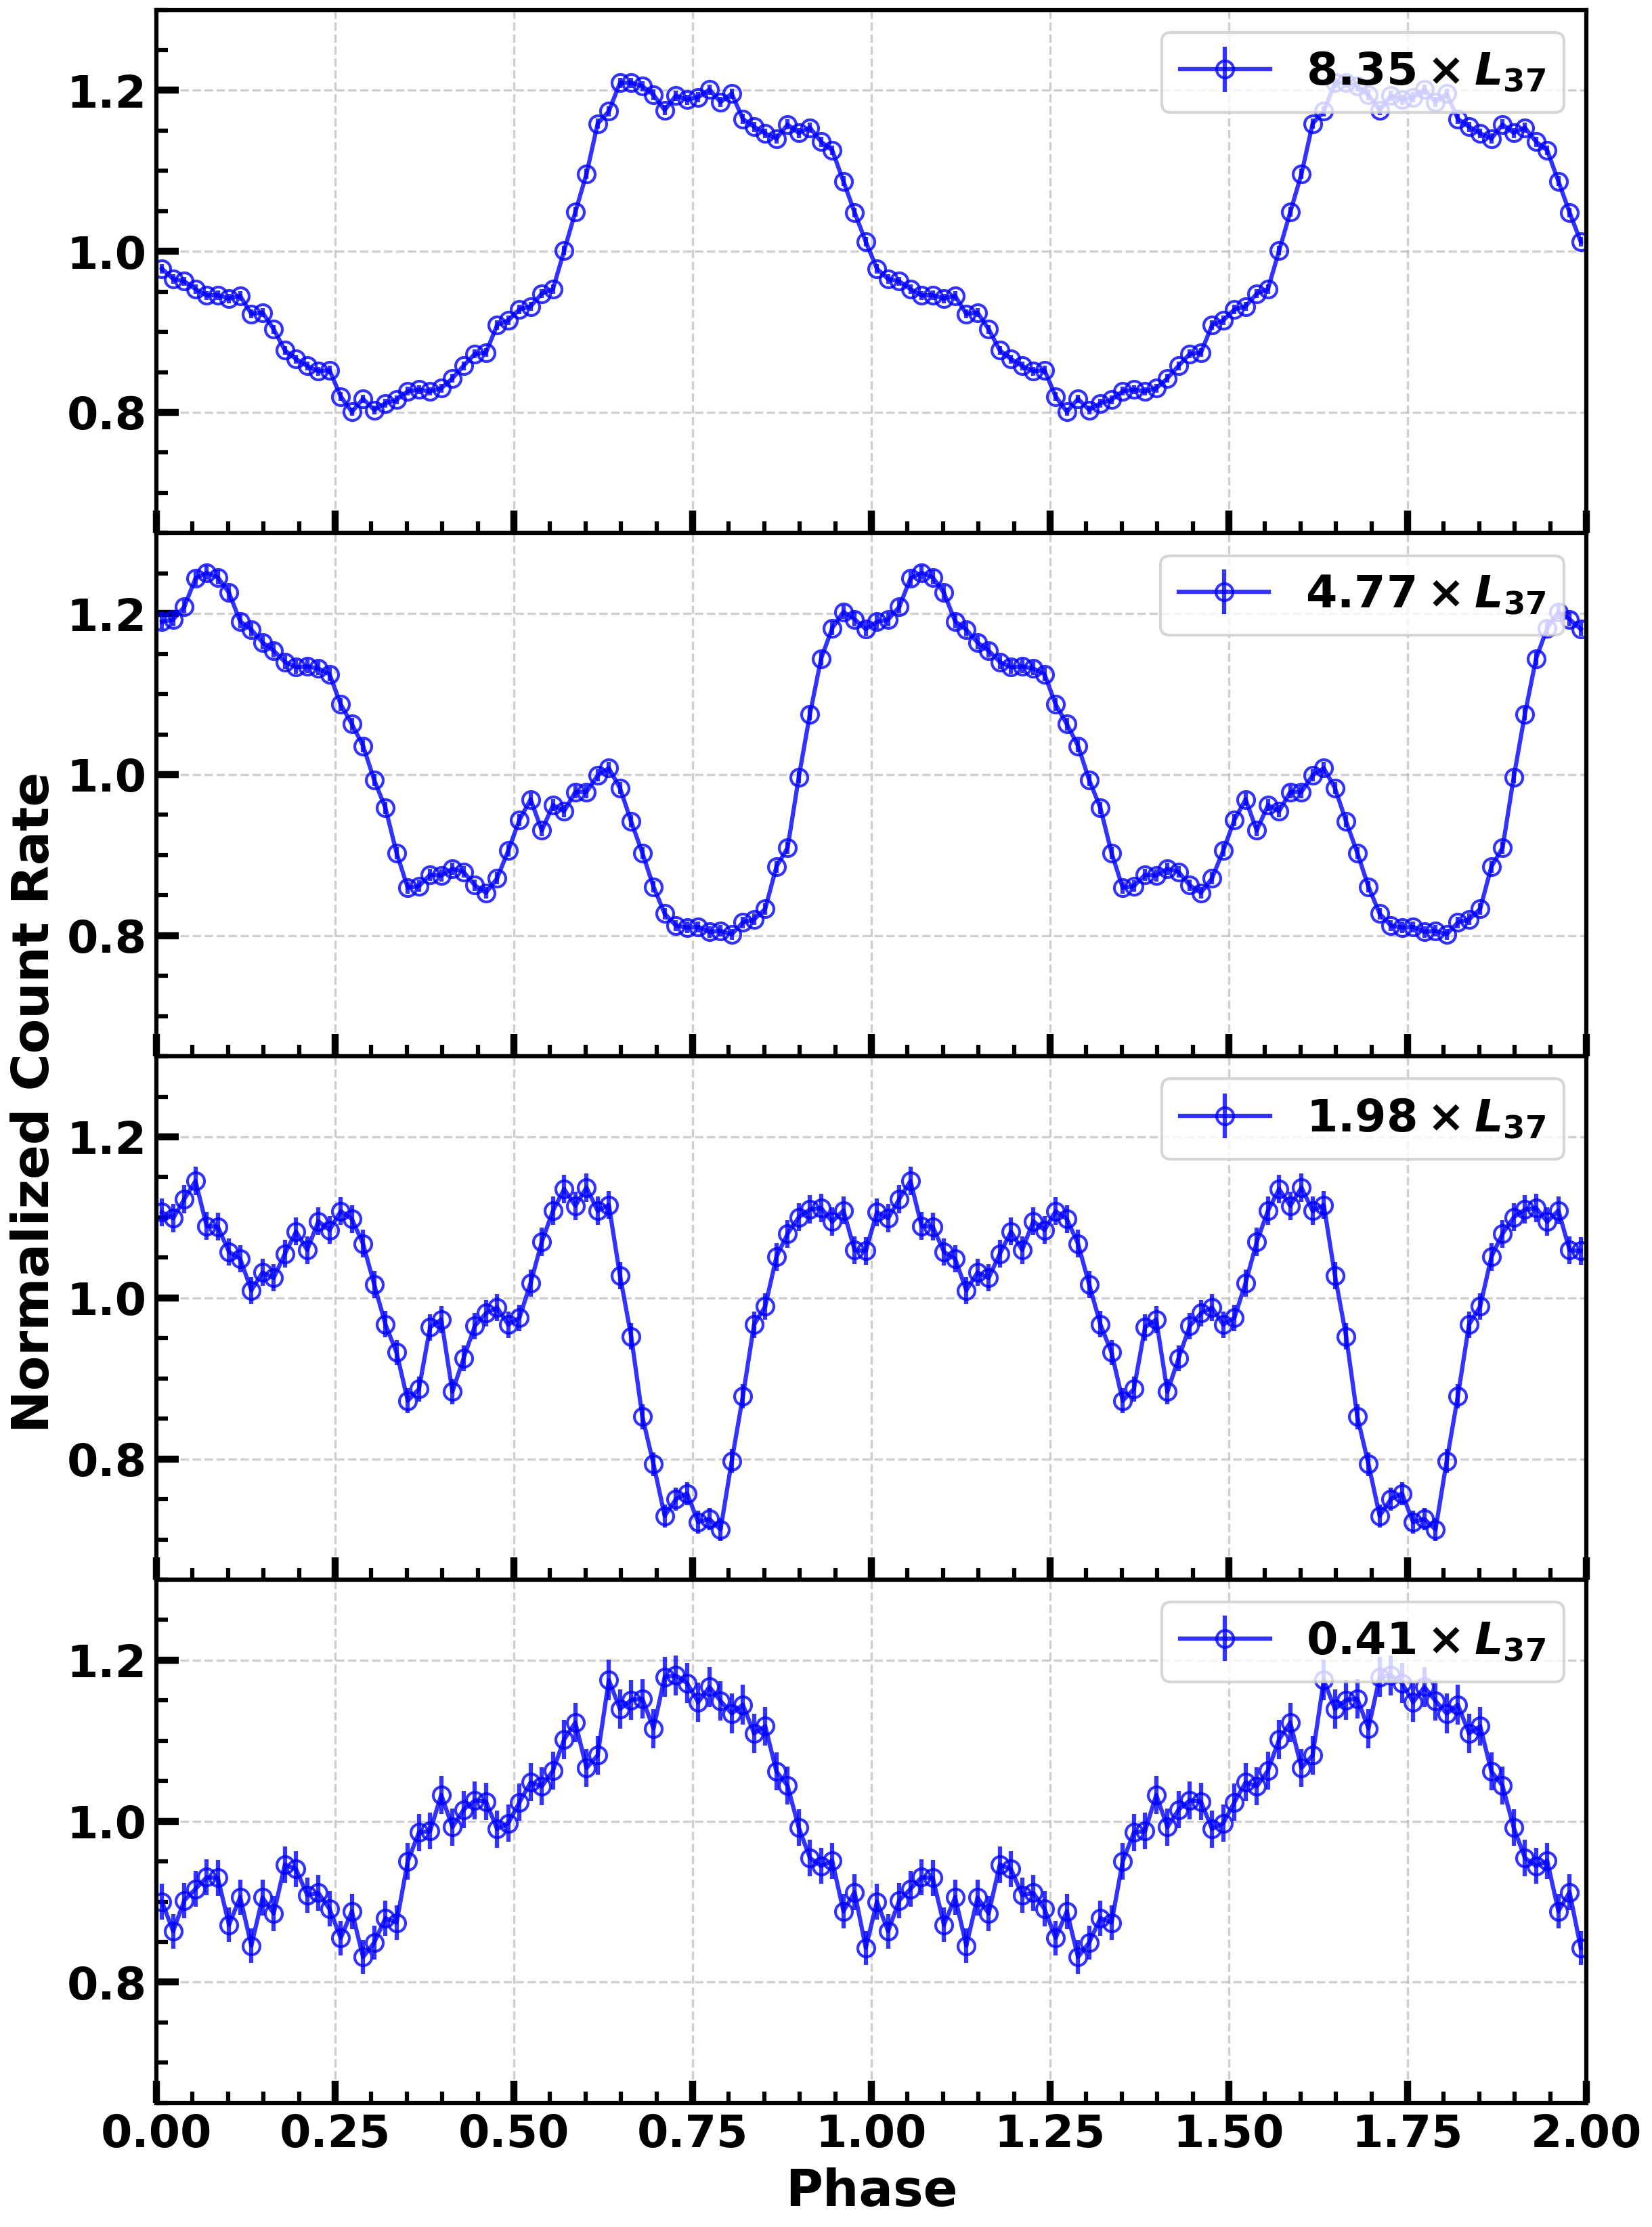

In [14]:
## Run when using ma'am RMS code binning folding
file_paths=[ 
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390243/6050390243_rms_deviation_flux_errors.fits',
#'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390251/6050390251_rms_deviation_flux_errors.fits',
#'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390234/6050390234_rms_deviation_flux_errors.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_rms_deviation_flux_errors.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390265/6050390265_rms_deviation_flux_errors.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390279/6050390279_rms_deviation_flux_errors.fits',]

label_lumin=[r'$8.35\times L_{37}$',
             #r'$7.63\times L_{37}$',
             #r'$6.97\times L_{37}$',
             r'$4.77\times L_{37}$',
             r'$1.98\times L_{37}$',
             r'$0.41\times L_{37}$']

savepath='/home/supremekai/thesis/J0243_6p6124/plot_pulse_profile_lumin_nicer.png'

read_and_plot_fits_file(file_paths,savepath,label_lumin)

In [1]:
## Run when using efold output fits for profile
file_paths=[ 
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390243/6050390243_pulse_profile_lc_files_efold_output_same_epoch.fits',
#'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390251/6050390251_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390234/6050390234_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390265/6050390265_pulse_profile_lc_files_efold_output_same_epoch.fits',
'/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390279/6050390279_pulse_profile_lc_files_efold_output_same_epoch.fits',]

label_lumin=[r'$8.35\times L_{37}$',
             #r'$7.63\times L_{37}$',
             r'$6.97\times L_{37}$',
             r'$4.77\times L_{37}$',
             r'$1.98\times L_{37}$',
             r'$0.41\times L_{37}$']

savepath='/home/supremekai/thesis/J0243_6p6124/plot_pulse_profile_lumin_nicer.png'

read_and_plot_fits_file(file_paths,savepath,label_lumin)


NameError: name 'read_and_plot_fits_file' is not defined

## Plotting RMS with Pulse profile

In [2]:
# def plot_six_panels(fits_files,output_path):
#     """
#     Plots 6 panels of data from FITS files. Each observation ID will have two plots:
#     - Left panel: Phase vs Avg Flux
#     - Right panel: RMS vs Phase

#     Parameters:
#     fits_files (list): List of file paths to FITS files ending with 'rms_deviation_flux_errors.fits'.
#     """
#     num_files = len(fits_files)
#     num_panels = min(num_files, 6)  # Limit to 6 panels
#     fig, axes = plt.subplots(num_panels, 2, figsize=(15, 4 * num_panels), sharex=True)

#     for i, file in enumerate(fits_files[:num_panels]):
#         with fits.open(file) as hdul:
#             data = hdul[1].data
#             phase = np.concatenate([data['PHASE'], data['PHASE'] + 1])  # Repeat for two cycles
#             avg_flux = np.concatenate([data['AVG_FLUX'], data['AVG_FLUX']])
#             avg_flux_err = np.concatenate([data['AVG_FLUX_ERROR'], data['AVG_FLUX_ERROR']])
#             rms = np.concatenate([data['RMS'], data['RMS']])
#             rms_err = np.concatenate([data['RMS_ERROR'], data['RMS_ERROR']])
#             rms_normalized = rms / avg_flux
#             rms_err_normalized = np.abs(rms_normalized) * np.sqrt((rms_err / rms)**2 + (avg_flux_err / avg_flux)**2)

#         # Left panel: Phase vs Avg Flux with error bars
#         axes[i, 0].errorbar(phase, avg_flux, yerr=avg_flux_err, fmt='-o', label='Avg Flux', capsize=3, color='blue')
#         if i == num_panels - 1:
#             axes[i, 0].set_xlabel('Phase', fontsize=11)
#         axes[i, 0].set_ylabel('Count Rate', fontsize=11)
#         axes[i, 0].grid(alpha=0.7, linestyle='--')

#         # Right panel: RMS vs Phase with error bars
#         axes[i, 1].errorbar(phase, rms_normalized * 100, yerr=rms_err_normalized * 100, fmt='-o', label='RMS', color='orange', capsize=3)
#         if i == num_panels - 1:
#             axes[i, 1].set_xlabel('Phase', fontsize=11)
#         axes[i, 1].set_ylabel('RMS%', fontsize=11)
#         axes[i, 1].grid()

#     plt.tight_layout()
#     plt.savefig(output_path,dpi=500,bbox_inches='tight')
#     plt.show()


## Overplotting the same 

In [26]:
from matplotlib import pyplot as plt
plt.style.use('astro')
import numpy as np
import pandas as pd
from astropy.io import fits

def plot_six_panels(fits_files, output_path, labels=None):
    """
    Plots up to 6 panels from FITS files. Each panel shows:
    - Left Y-axis: Phase vs Avg Flux (pulse profile)
    - Right Y-axis: RMS% vs Phase (normalized RMS)

    Parameters:
    fits_files (list): List of file paths to FITS files ending with 'rms_deviation_flux_errors.fits'.
    output_path (str): Path to save the final plot image.
    """

    num_files = len(fits_files)
    num_panels = min(num_files, 6)  # Limit to 6 panels
    fig, axes = plt.subplots(num_panels, 1, figsize=(10, 3.5 * num_panels), sharex=True)

    if num_panels == 1:
        axes = [axes]

    for i, file in enumerate(fits_files[:num_panels]):
        with fits.open(file) as hdul:
            data = hdul[1].data
            phase = np.concatenate([data['PHASE'], data['PHASE'] + 1])
            avg_flux = np.concatenate([data['AVG_FLUX'], data['AVG_FLUX']])
            avg_flux_err = np.concatenate([data['AVG_FLUX_ERROR'], data['AVG_FLUX_ERROR']])
            rms = np.concatenate([data['RMS'], data['RMS']])
            rms_err = np.concatenate([data['RMS_ERROR'], data['RMS_ERROR']])
            rms_normalized = rms / avg_flux
            rms_err_normalized = np.abs(rms_normalized) * np.sqrt((rms_err / rms) ** 2 + (avg_flux_err / avg_flux) ** 2)

        ax1 = axes[i]
        ax2 = ax1.twinx()

        # Plot pulse profile
        ax1.errorbar(phase, avg_flux, yerr=avg_flux_err, fmt='-o', color='blue',
                         capsize=3, markerfacecolor='none', label=labels[i])
        # else:
        #     ax1.errorbar(phase, avg_flux, yerr=avg_flux_err, fmt='-o', color='blue',
        #                  capsize=3, markerfacecolor='none', label='Count Rate',label=labels[i])

        ax1.set_ylabel('Count Rate', color='blue', weight='bold')
        ax1.tick_params(axis='y', labelcolor='blue', direction='in', width=2)
        ax1.tick_params(axis='x', width=2, direction='in')
        ax1.minorticks_on()
        ax1.tick_params(which='minor', width=1.5, direction='in')
        ax1.grid(alpha=0.6)

       
        # Plot RMS
        ax2.errorbar(phase, rms_normalized, yerr=rms_err_normalized, fmt='-s',
                     color='grey', capsize=3, label='RMS', markerfacecolor='none')
        ax2.set_ylabel('RMS', color='black', weight='bold')
        ax2.tick_params(axis='y', labelcolor='black', direction='in', width=2)
        ax2.minorticks_on()
        ax2.tick_params(which='minor', width=1.5, direction='in')

        if i == num_panels - 1:
            ax1.set_xlabel('Phase', weight='bold')

         # Legend with bold font
        legend = ax1.legend(loc='upper right', framealpha=0.8)
        # Force bold appearance
        for text in legend.get_texts():
            text.set_fontweight('bold')
            text.set_fontfamily('serif')  # Or try 'Arial' if DejaVu doesn't work well


    plt.tight_layout()
    plt.savefig(output_path, dpi=500, bbox_inches='tight')
    plt.show()


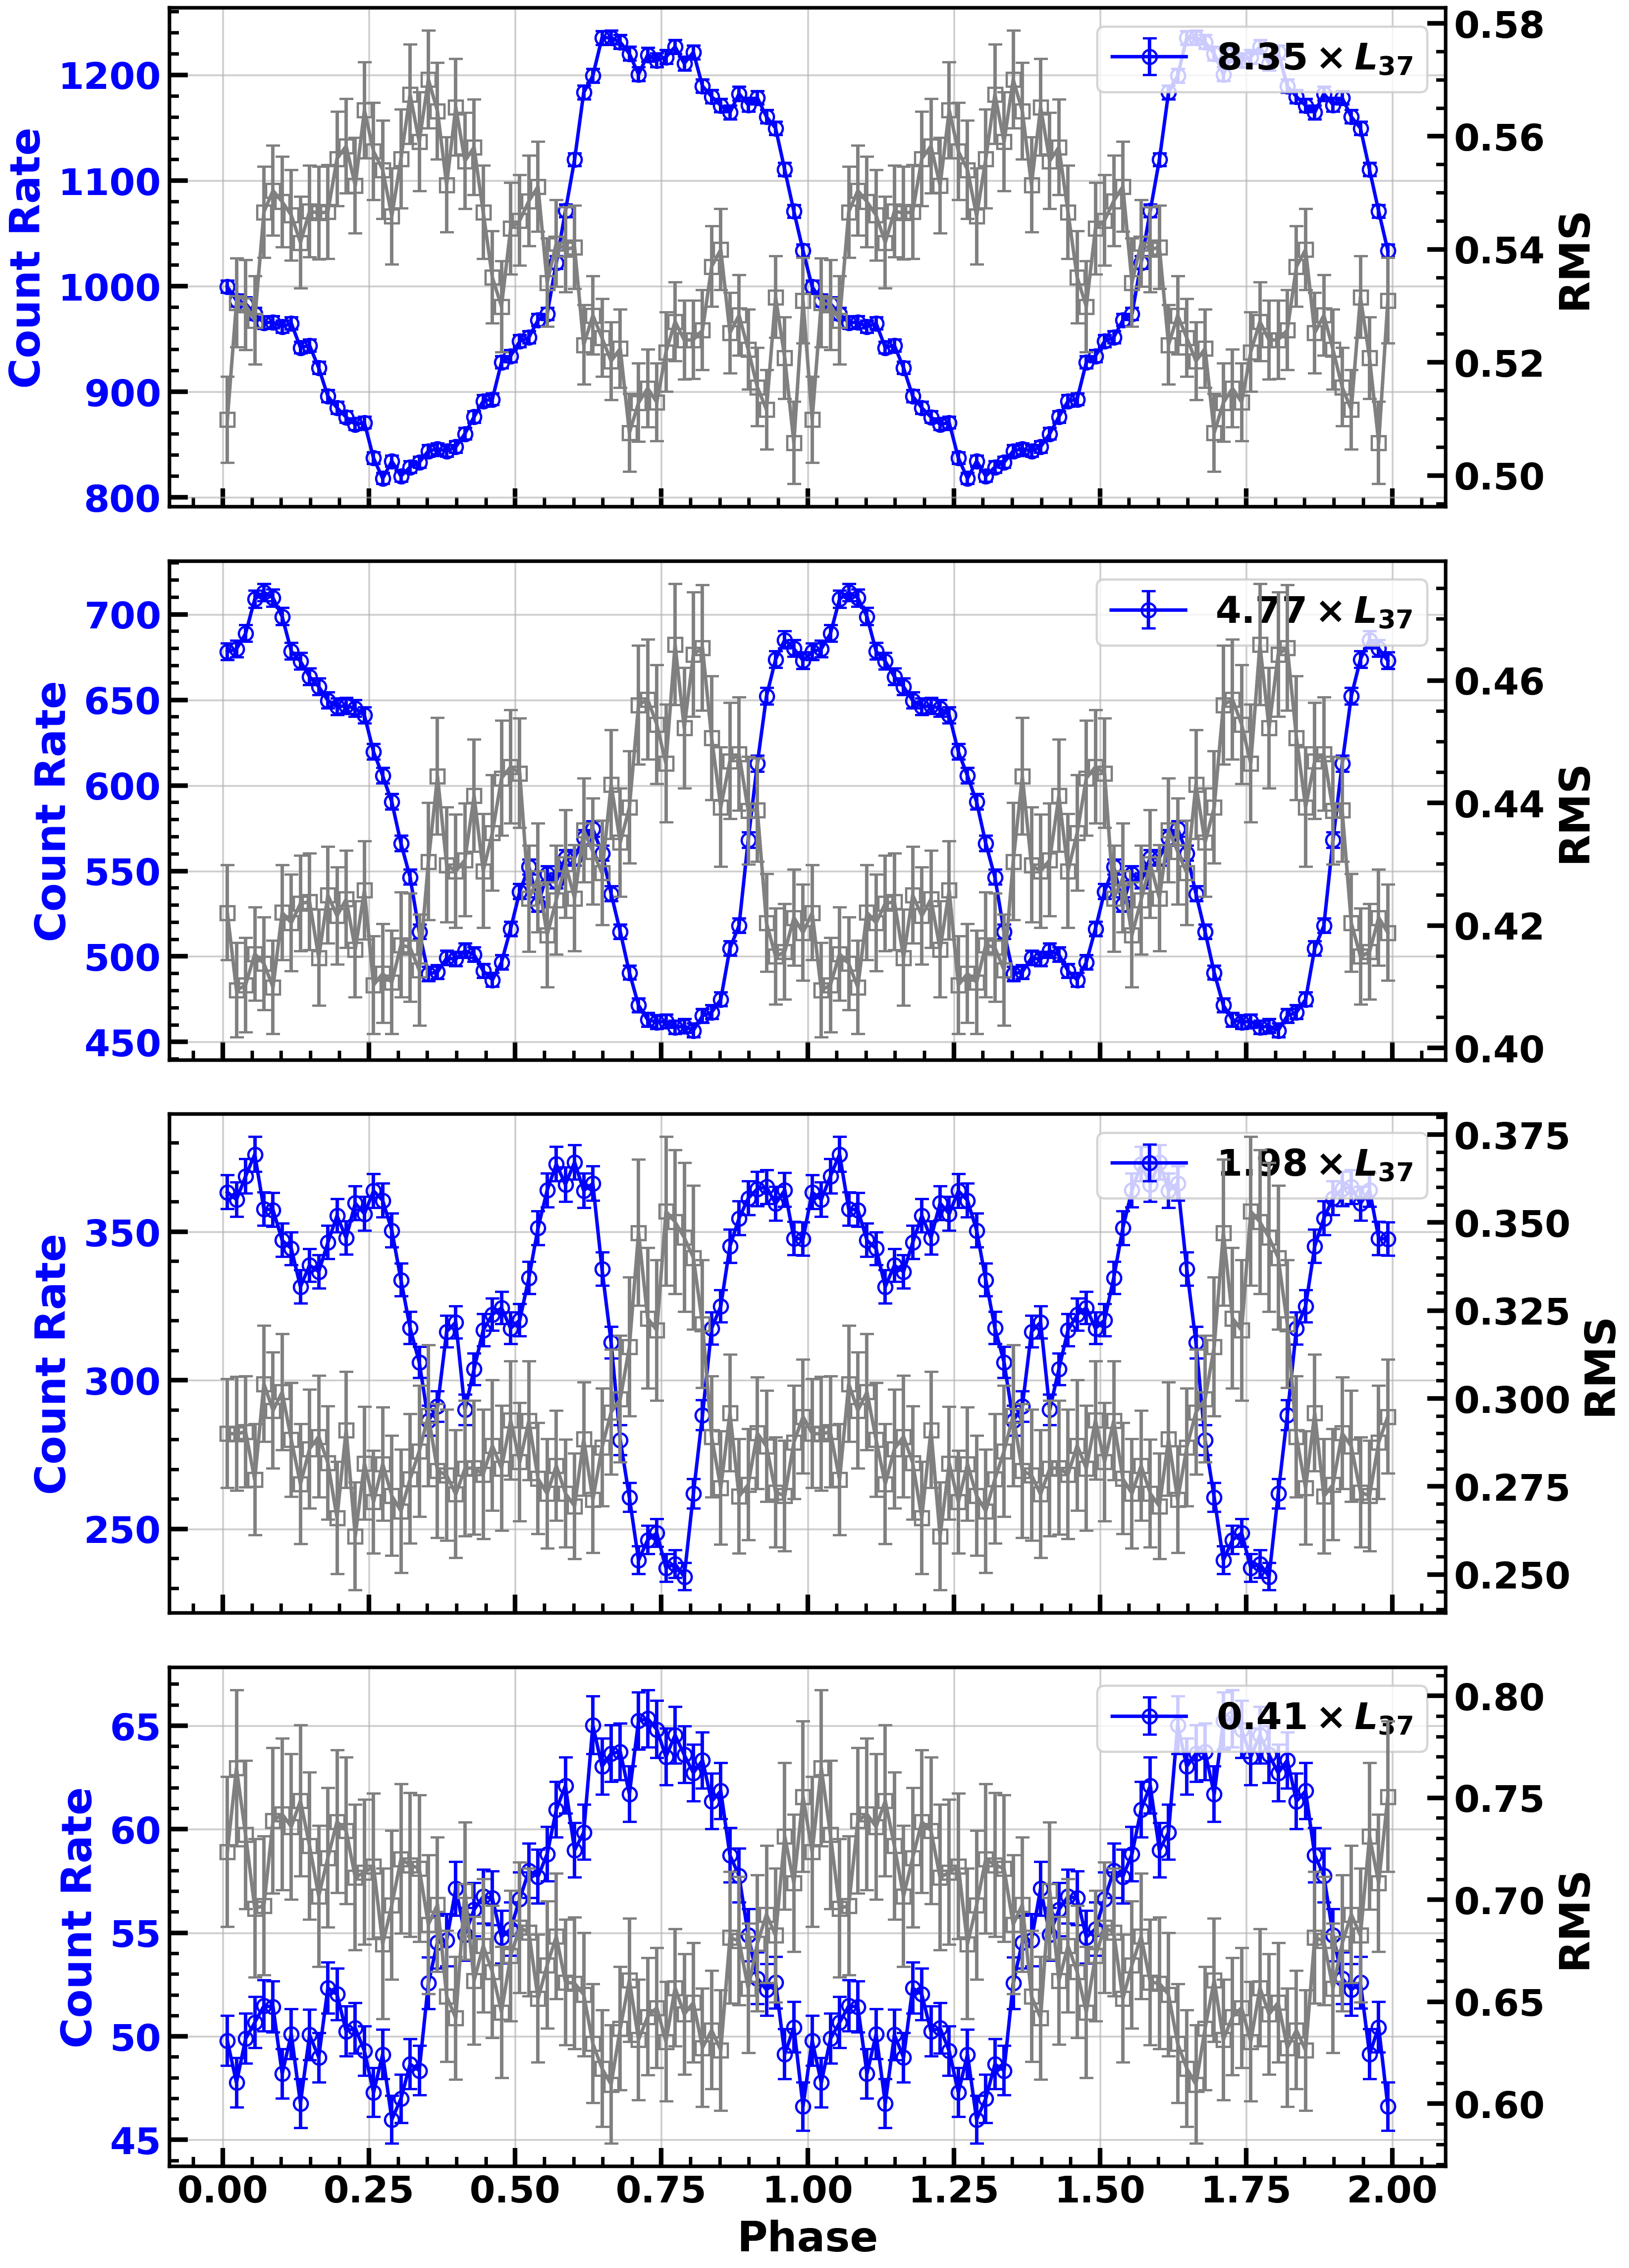

In [27]:
fits_files_decline=[
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390243/6050390243_rms_deviation_flux_errors.fits',
    # '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390234/6050390234_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390265/6050390265_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390279/6050390279_rms_deviation_flux_errors.fits',
    ]


label_lumin=[r'$8.35\times L_{37}$',
             #r'$7.63\times L_{37}$',
             #r'$6.97\times L_{37}$',
             r'$4.77\times L_{37}$',
             r'$1.98\times L_{37}$',
             r'$0.41\times L_{37}$']


output_path="/home/supremekai/thesis/J0243_6p6124/plot_rms_variation_NICER_lumin.png"

plot_six_panels(fits_files_decline,output_path,label_lumin)

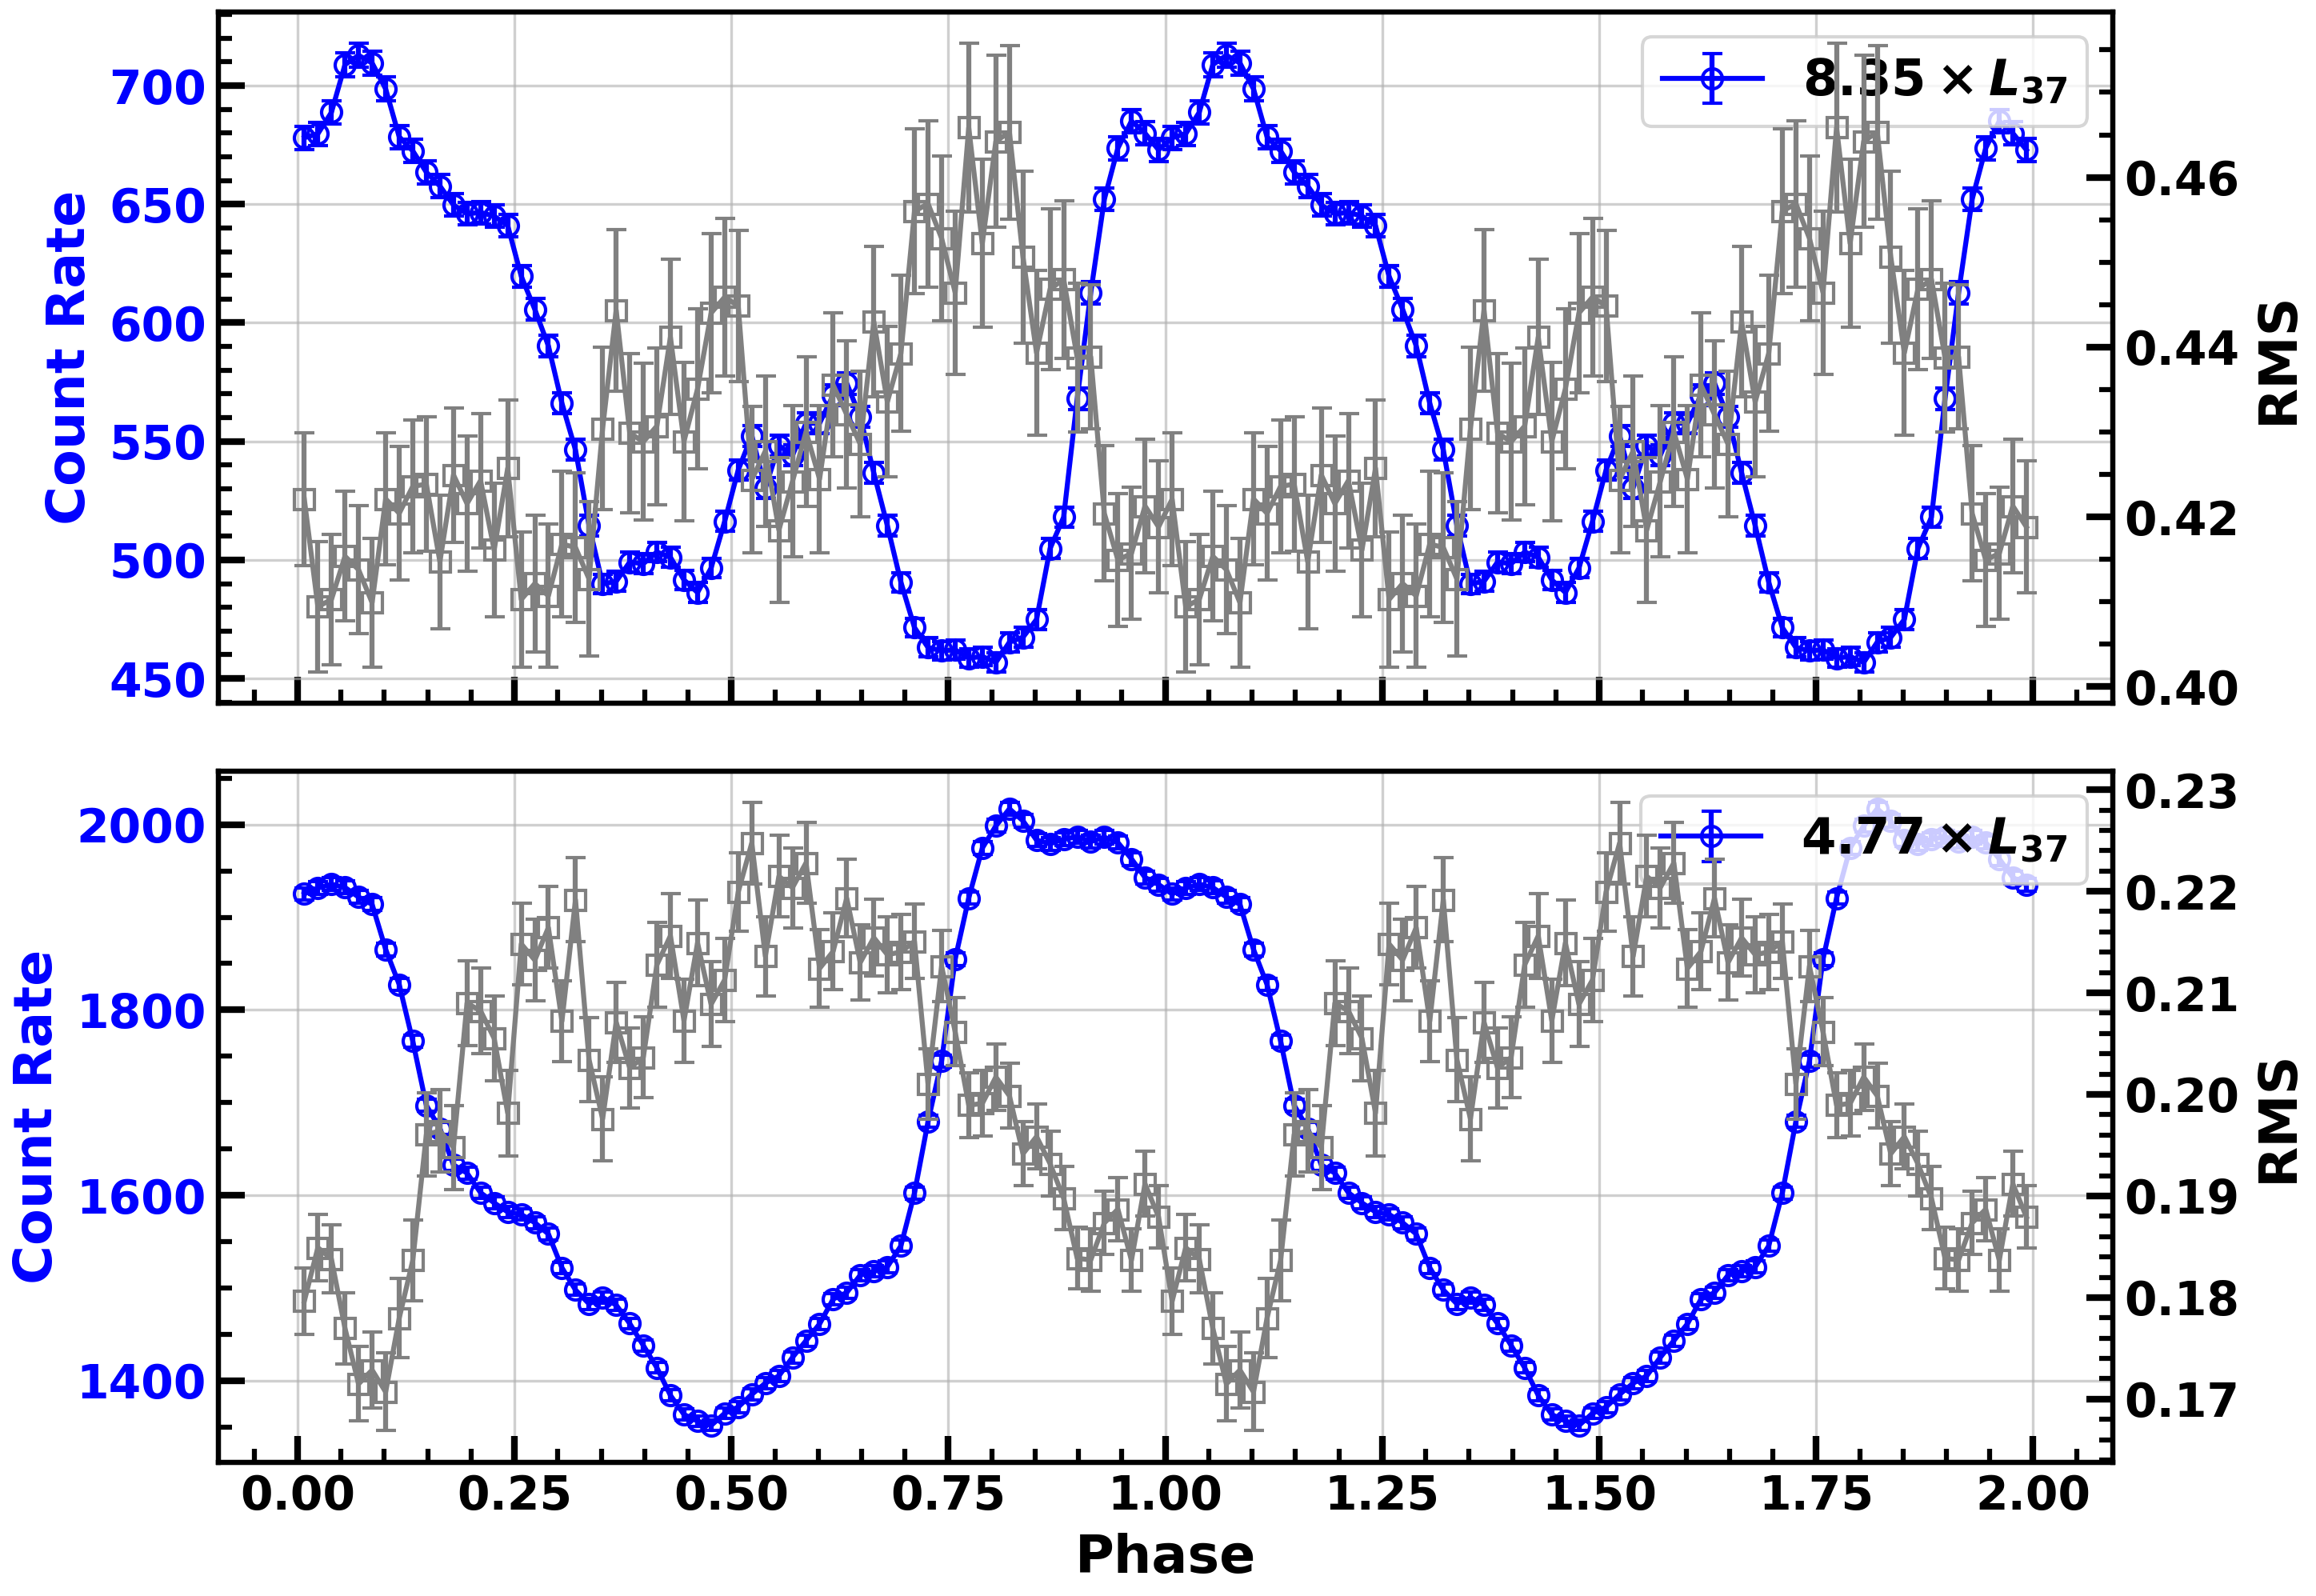

In [12]:
fits_files = [
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390227/6050390227_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390248/6050390248_rms_deviation_flux_errors.fits',
]

plot_six_panels(fits_files,"/home/supremekai/thesis/J0243_6p6124/rms_rise_NICER.png",label_lumin)


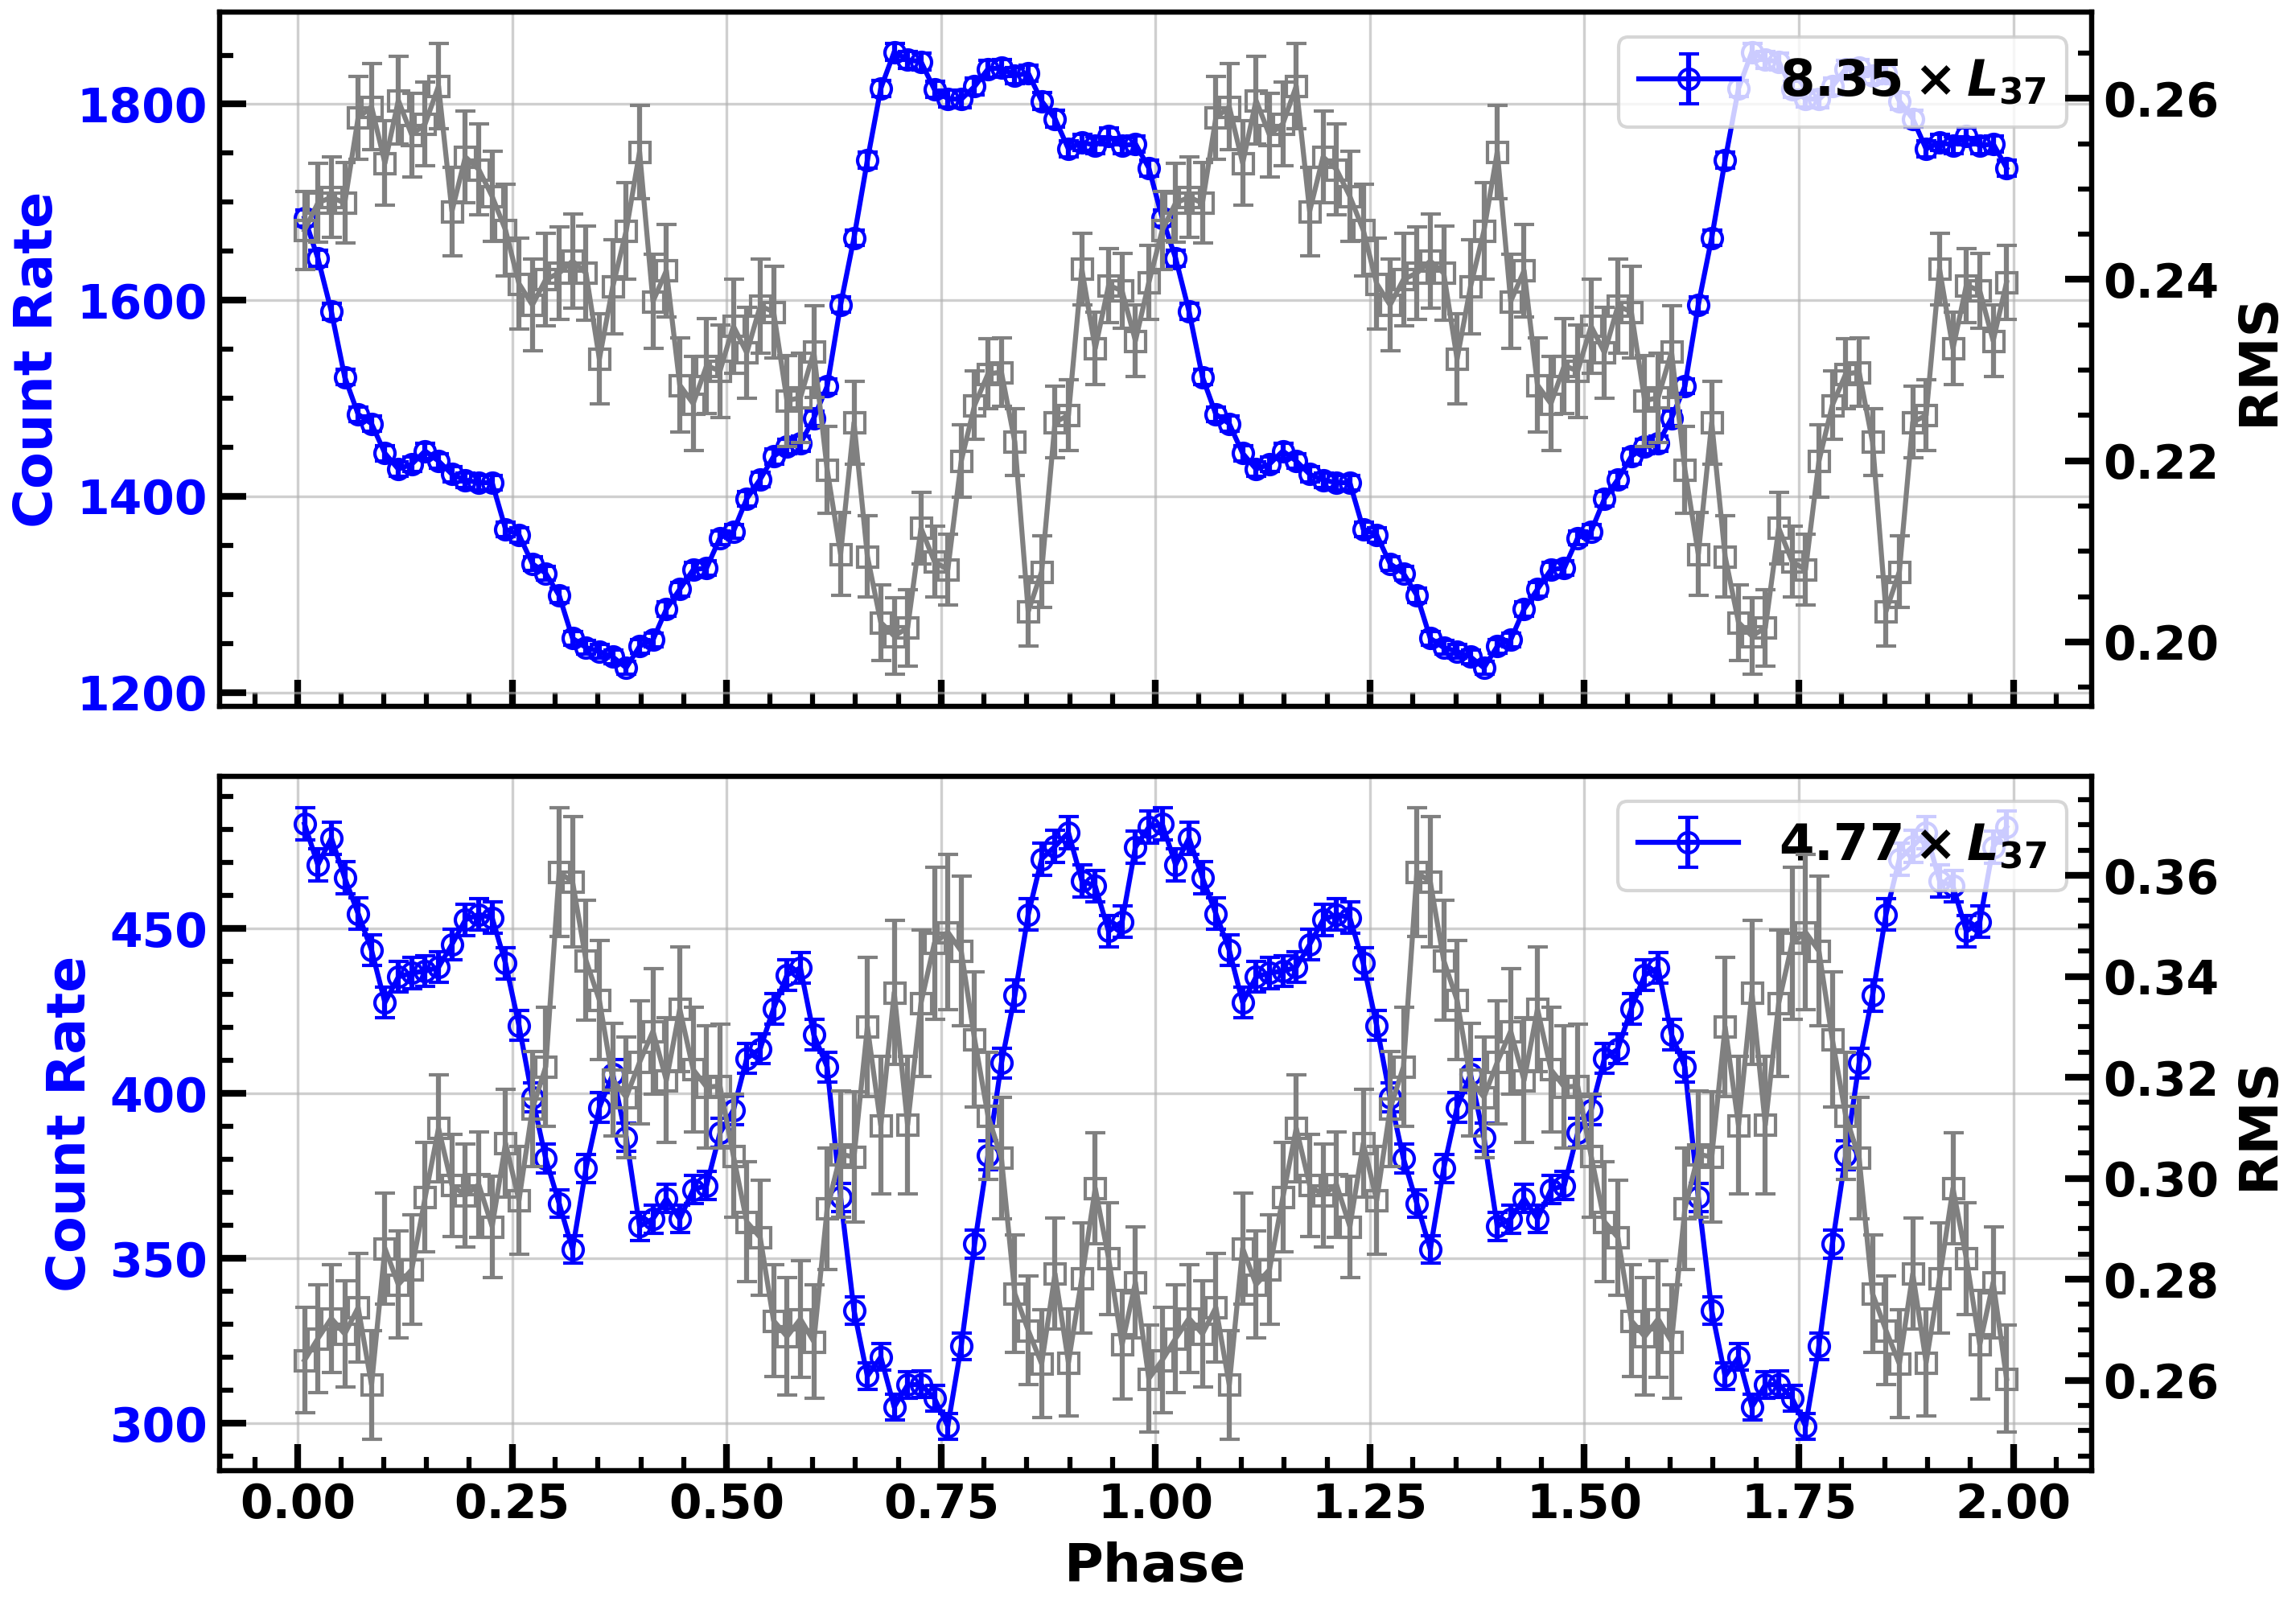

In [13]:
fits_files_decline=[
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390252/6050390252_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390262/6050390262_rms_deviation_flux_errors.fits',
    ]

plot_six_panels(fits_files_decline,"/home/supremekai/thesis/J0243_6p6124/rms_decline_NICER.png",label_lumin)

TypeError: 'NoneType' object is not subscriptable

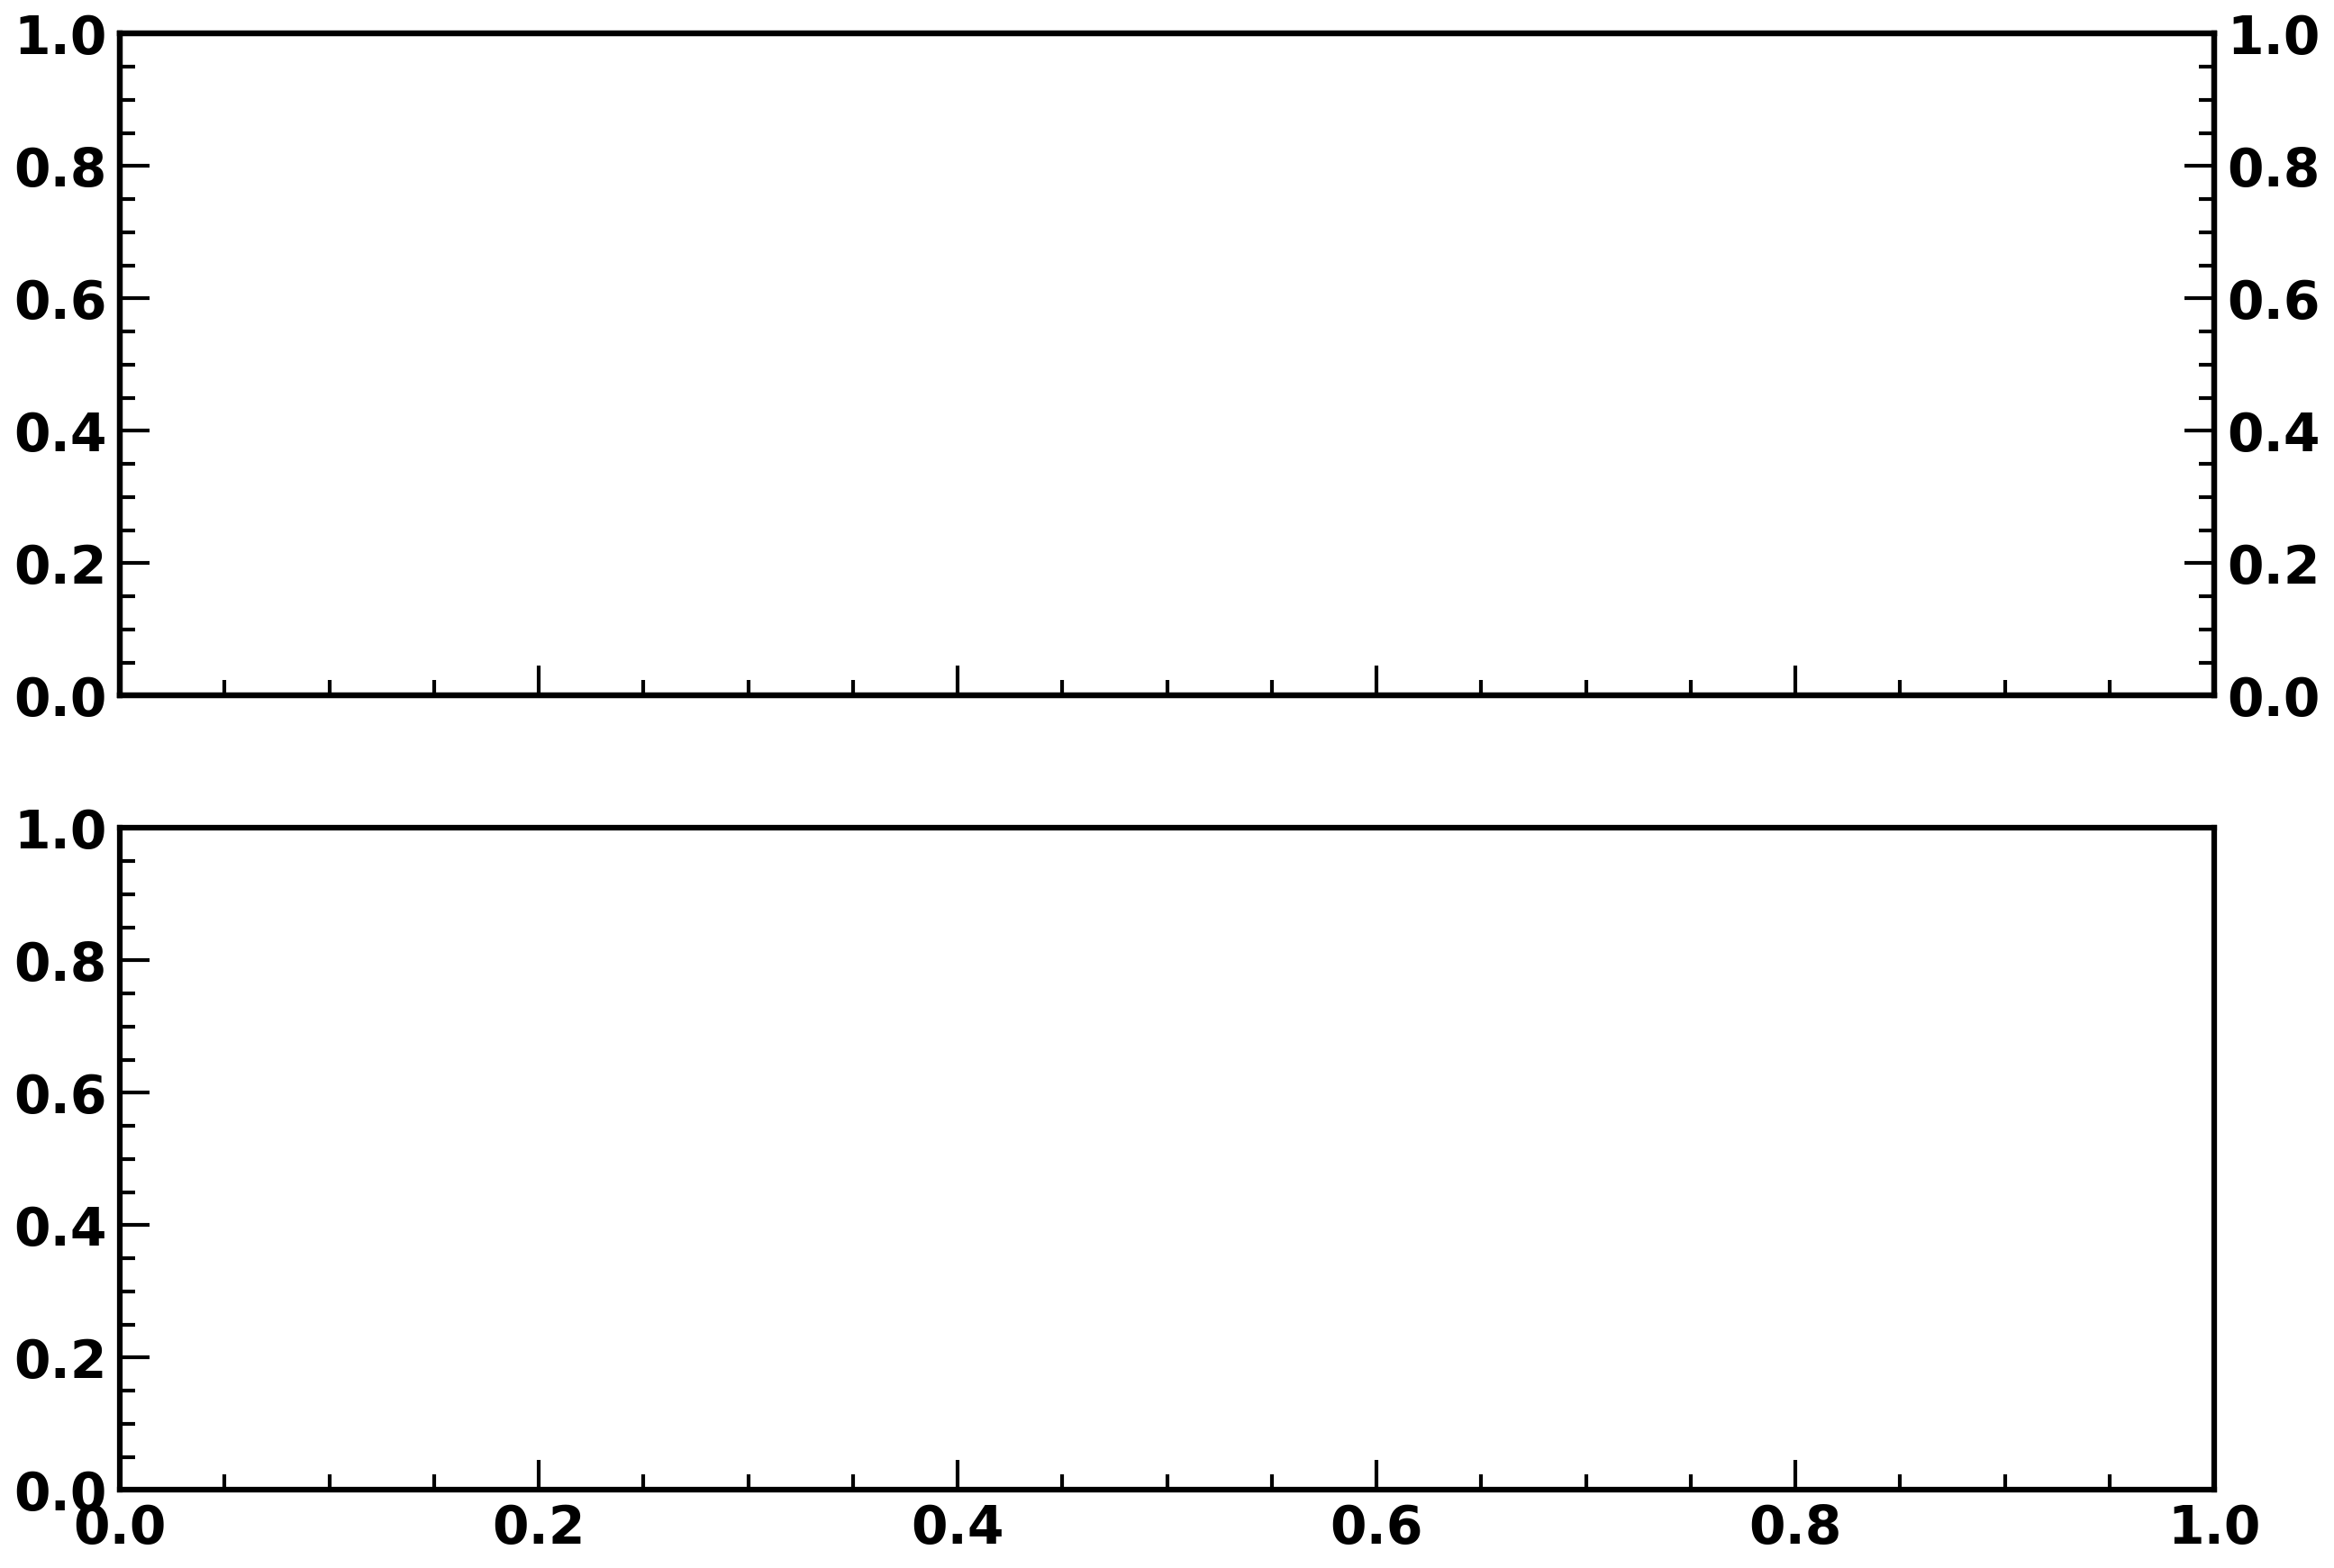

In [14]:
fits_files_hxmt=[
    '/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419600101_LE_lcnet_2-10keV_0.05s/P050419600101_LE_lcnet_2-10keV_0.05s_rms_deviation_flux_errors.fits',
    '/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419601902_LE_lcnet_2-10keV_0.05s/P050419601902_LE_lcnet_2-10keV_0.05s_rms_deviation_flux_errors.fits',
    ]

plot_six_panels(fits_files_hxmt,"/home/supremekai/thesis/J0243_6p6124/rms_decline_hxmt_LE.png")

/tmp/ipykernel_1884/1491804929.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


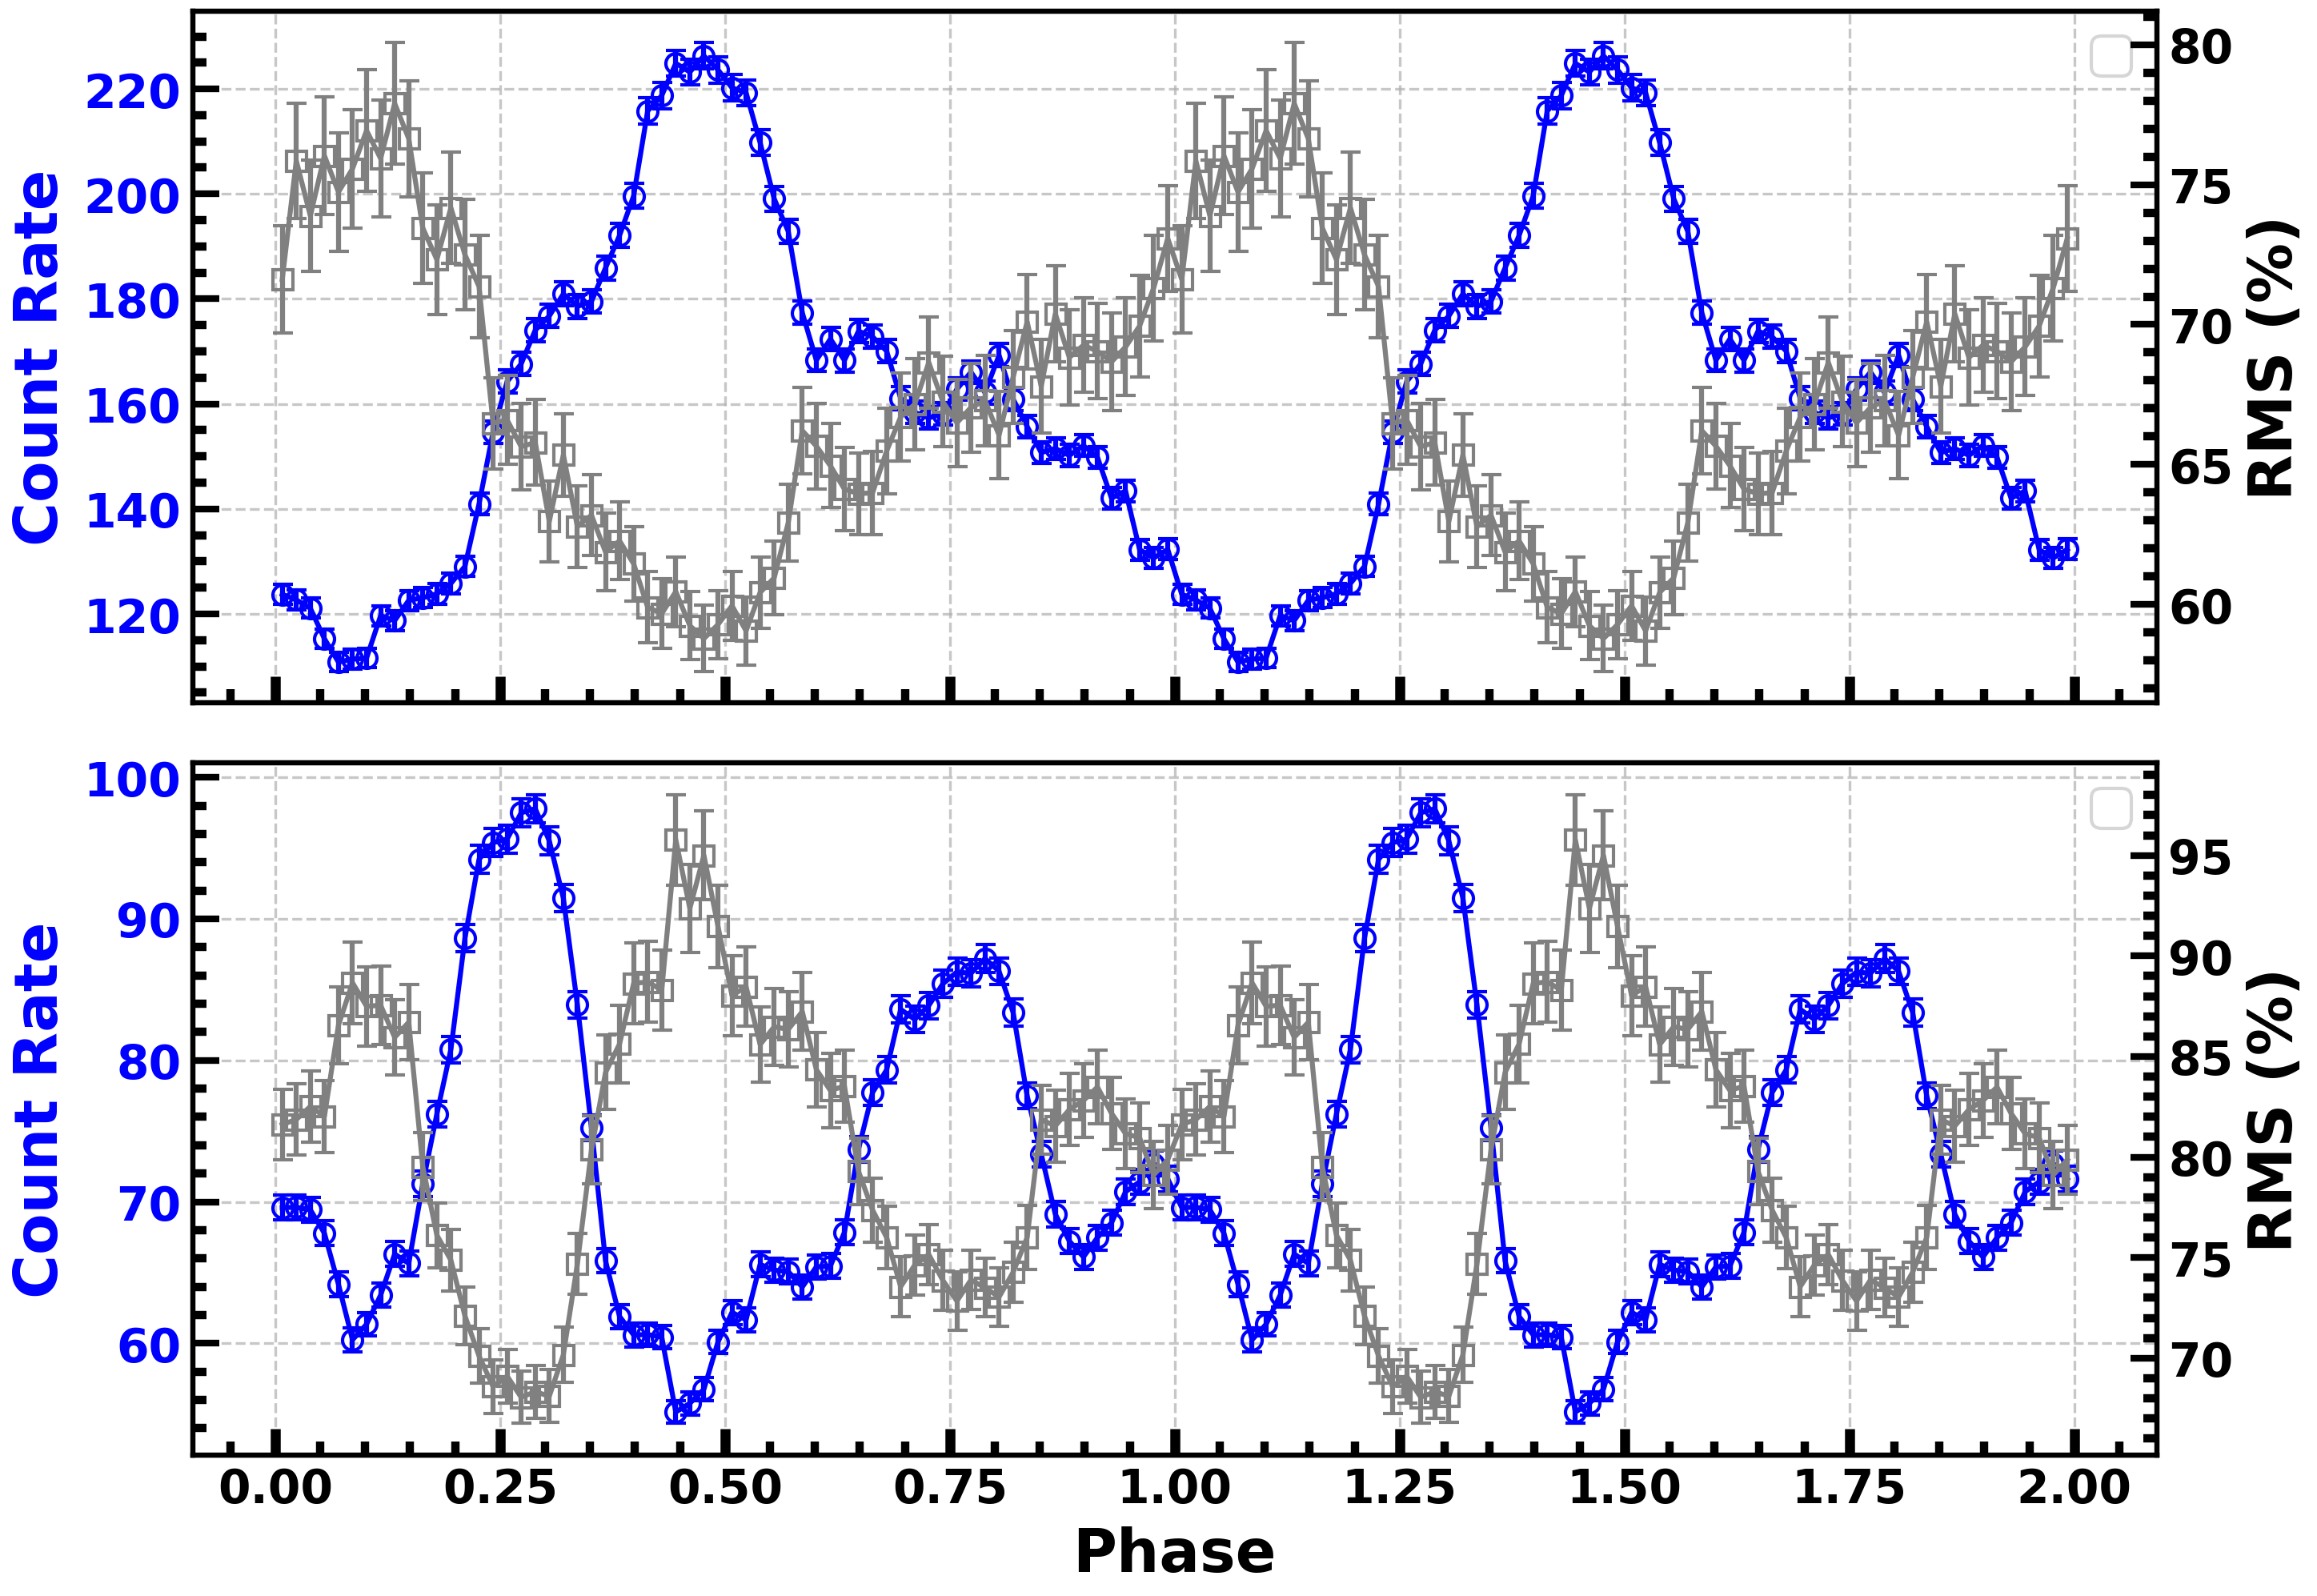

In [21]:
fits_files_hxmt_me=[
    "/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419600101_ME_lcnet_10-35keV_0.05s/P050419600101_ME_lcnet_10-35keV_0.05s_rms_deviation_flux_errors.fits",
    "/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419602101_ME_lcnet_10-35keV_0.05s/P050419602101_ME_lcnet_10-35keV_0.05s_rms_deviation_flux_errors.fits"
       ]

plot_six_panels(fits_files_hxmt_me,"/home/supremekai/thesis/J0243_6p6124/rms_decline_hxmt_ME.png")

In [37]:
def plot_nicer_and_hxmt(nicer_files, hxmt_files,savepath):
    """
    Plots NICER and HXMT data in a 2x2 grid:
    - Top left: NICER 0.8–10 keV
    - Top right: HXMT LE (2–10 keV)
    - Bottom left: HXMT ME (10–35 keV)
    - Bottom right: HXMT HE (20–250 keV)
    """

    import matplotlib.pyplot as plt
    from astropy.io import fits
    import numpy as np
    plt.style.use('astro')

    all_files = nicer_files + hxmt_files
    label_arr = ['0.8–10.0 keV', '2–10 keV', '10–35 keV', '20–250 keV']
    colors = ['blue', 'darkgreen', 'magenta', 'red']

    fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharex=True,
                             gridspec_kw={'hspace': 0.1, 'wspace': 0.20}
                            )

    axes = axes.flatten()

    for i, file in enumerate(all_files):
        with fits.open(file) as hdul:
            data = hdul[1].data
            phase = np.concatenate([data['PHASE'], data['PHASE'] + 1])  # two cycles
            avg_flux = np.concatenate([data['AVG_FLUX'], data['AVG_FLUX']])
            avg_flux_err = np.concatenate([data['AVG_FLUX_ERROR'], data['AVG_FLUX_ERROR']])
            rms = np.concatenate([data['RMS'], data['RMS']])
            rms_err = np.concatenate([data['RMS_ERROR'], data['RMS_ERROR']])

            rms_normalized = rms / avg_flux
            rms_err_normalized = np.abs(rms_normalized) * np.sqrt(
                (rms_err / rms)**2 + (avg_flux_err / avg_flux)**2
            )

        ax = axes[i]
        ax2 = ax.twinx()

        # Plot AVG_FLUX
        ax.errorbar(phase, avg_flux, yerr=avg_flux_err, fmt='-o',
                    label=label_arr[i], capsize=3, color=colors[i],
                    alpha=1, markerfacecolor='none')
        ax.set_ylabel('Count Rate', color=colors[i], weight='bold')
        ax.tick_params(axis='y', direction='in', labelcolor=colors[i])
        ax.grid(alpha=0.6)
        ax.legend(loc='upper right',framealpha=0.8)
        ax.minorticks_on()

        # Plot RMS%
        ax2.errorbar(phase, rms_normalized, yerr=rms_err_normalized,
                     fmt='-s', color='grey', capsize=3, label='RMS %',
                     markerfacecolor='none')
        ax2.set_ylabel('RMS', color='black', weight='bold')
        ax2.tick_params(axis='y', direction='in', colors='black')
        ax2.minorticks_on()

        # No x-axis labels except bottom row
        if i < 2:
            ax.tick_params(labelbottom=False)
        if i==2:
            ax.set_ylim(55,125)
        if i >= 2:
            ax.set_xlabel('Phase',weight='bold')

        ax.tick_params(axis='x', which='both', direction='in')

    #plt.subplots_adjust(left=0.0001, right=0.9999, bottom=0.08, top=0.97, hspace=0, wspace=0.25)
    plt.savefig(savepath, dpi=500, bbox_inches='tight', pad_inches=0.05)
    plt.show()


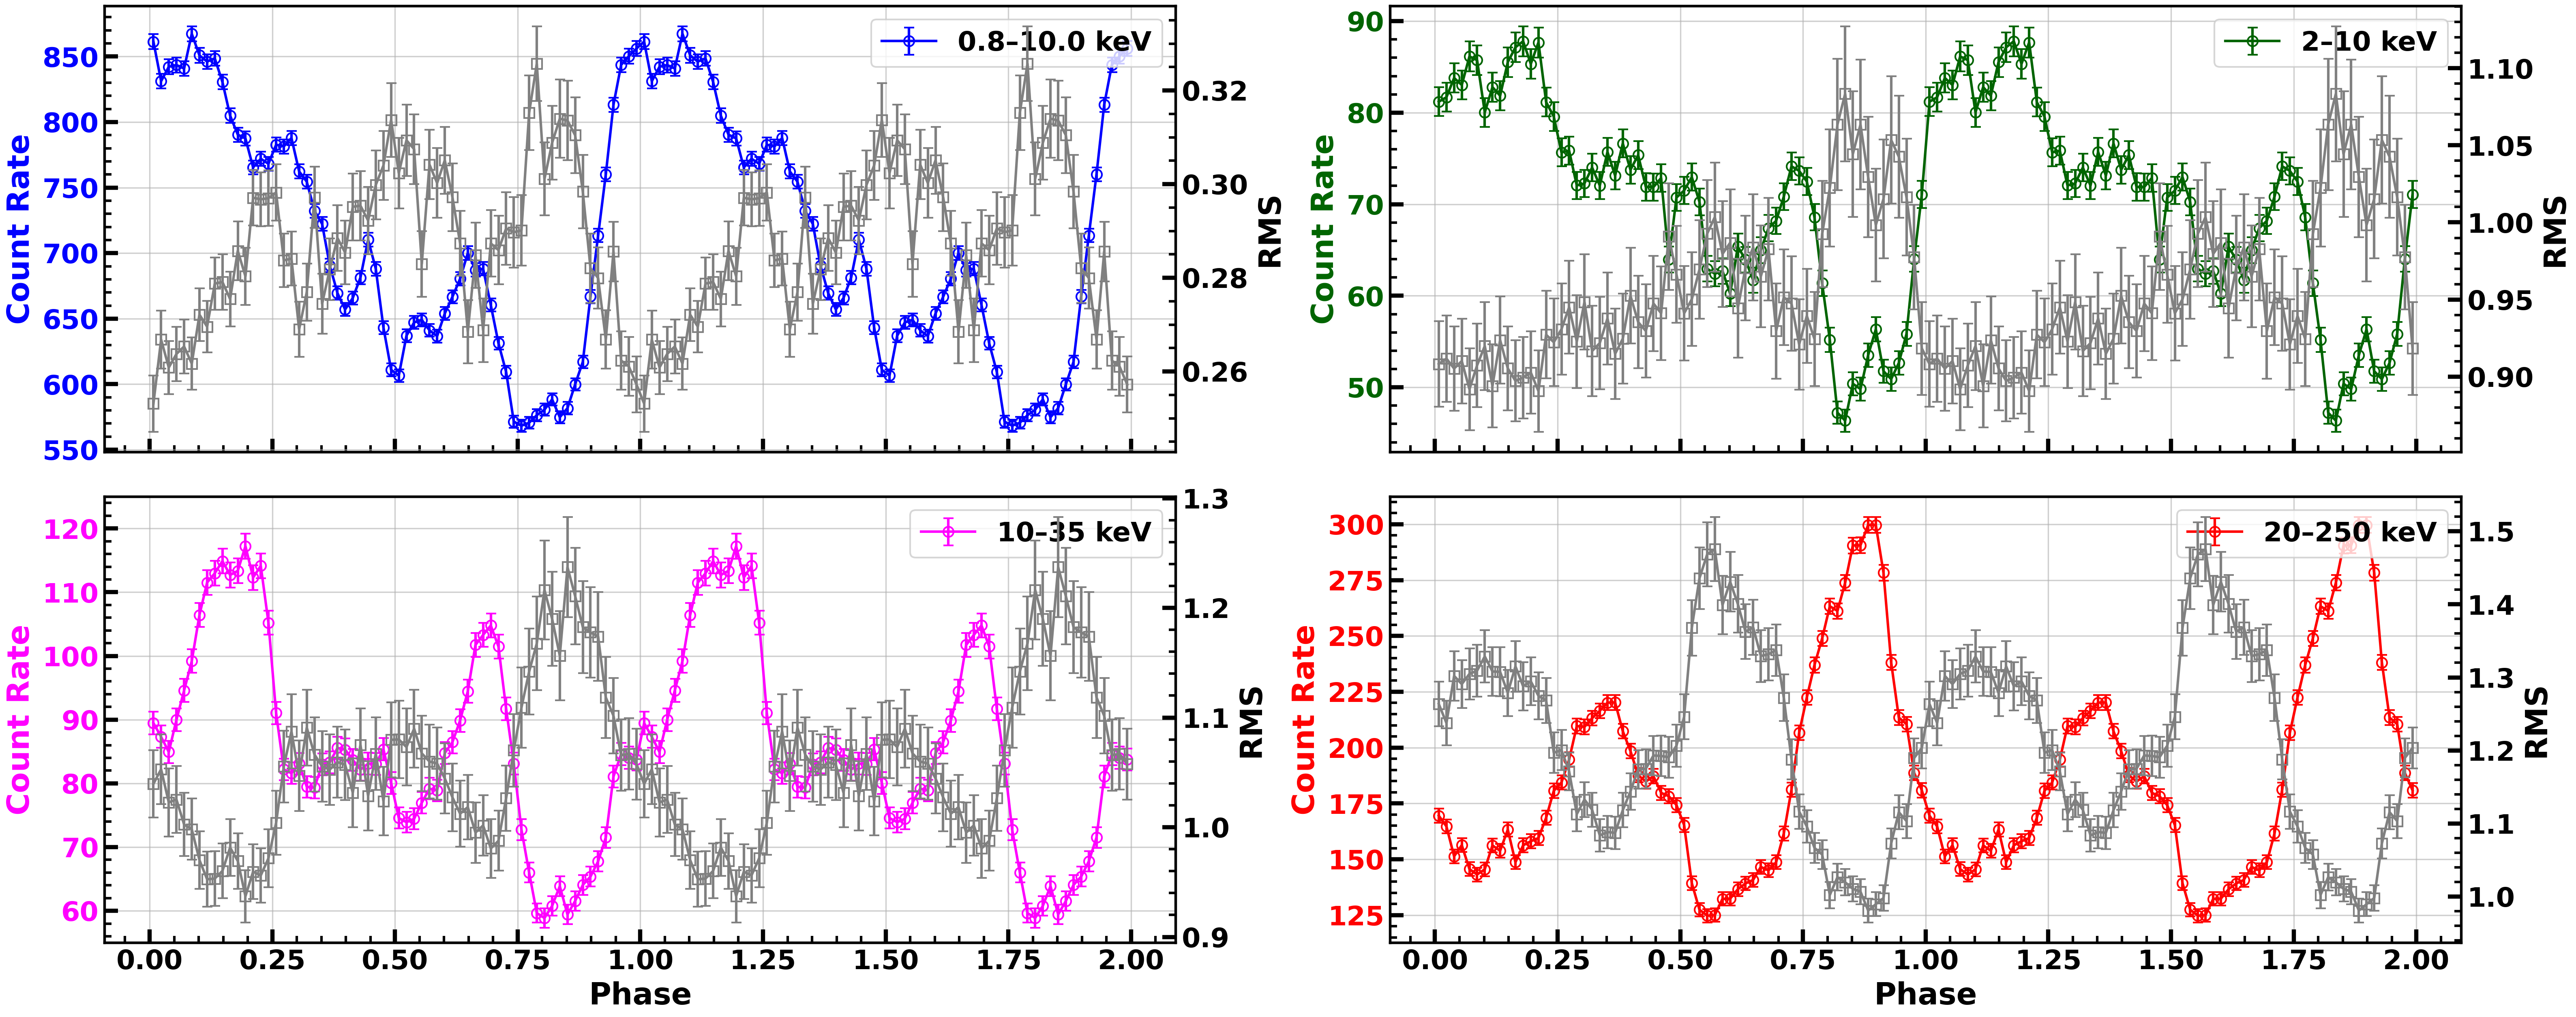

In [38]:
fits_files_decline=[
    '/home/supremekai/thesis/J0243_6p6124/NICER_second_run/folded_curves/6050390255/6050390255_rms_deviation_flux_errors.fits',
    ]

fits_files_hxmt=[
'/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419601301_LE_lcnet_2-10keV_0.05s/P050419601301_LE_lcnet_2-10keV_0.05s_rms_deviation_flux_errors.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419601301_ME_lcnet_10-35keV_0.05s/P050419601301_ME_lcnet_10-35keV_0.05s_rms_deviation_flux_errors.fits',
'/home/supremekai/thesis/J0243_6p6124/HXMT/rms_deviation_code_same_epoch/P050419601301_HE_lcnet_27-250keV_0.05s_all/P050419601301_HE_lcnet_27-250keV_0.05s_all_rms_deviation_flux_errors.fits'
]

savepath="/home/supremekai/thesis/J0243_6p6124/plot_rms_combined_NICER_v_HXMT.png"
plot_nicer_and_hxmt(fits_files_decline,fits_files_hxmt,savepath)